# Sieć tramwajów we Wrocławiu

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

In [3]:
trams = {
    1: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Piastowska", "Prusa", "Wyszyńskiego", "Nowowiejska", "Słowiańska", "Dworzec Nadodrze", "Trzebnicka", "Broniewskiego", "Kamieńskiego", "Kępińska", "Wołowska", "Poświętne"],
    2: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Reja", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Pułaskiego", "Dworzec Główny", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    3: ["Księże Małe", "Głubczycka", "Karwińska", "Park Wschodni", "Armii Krajowej", "Krakowska (Centrum Handlowe)", "Krakowska", "Na Niskich Łąkach", "Pl. Zgody (Muzeum Etnograficzne)", "Pl. Wróblewskiego", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    4: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Hutmen", "Bzowa (Centrum Historii Zajezdnia)", "Pl. Srebrny", "Stalowa", "Pereca", "Grabiszyńska", "Kolejowa", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Główny", "Pułaskiego", "Kościuszki", "Komuny Paryskiej", "Pl. Wróblewskiego", "Urząd Wojewódzki (Impart)", "Most Grunwaldzki", "Pl. Grunwaldzki", "Kliniki - Politechnika Wrocławska", "Hala Stulecia", "Zoo", "Tramwajowa", "Chełmońskiego", "Piramowicza (Kampus Biskupin)", "Spółdzielcza", "Biskupin"],
    5: ["Księże Małe", "Głubczycka", "Karwińska", "Park Wschodni", "Armii Krajowej", "Krakowska (Centrum Handlowe)", "Krakowska", "Na Niskich Łąkach", "Pl. Zgody (Muzeum Etnograficzne)", "Pl. Wróblewskiego", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Narodowe Forum Muzyki", "Pl. Legionów", "Kolejowa", "Grabiszyńska", "Pereca", "Stalowa", "Pl. Srebrny", "Bzowa (Centrum Historii Zajezdnia)", "Hutmen", "FAT", "Fiołkowa", "Grabiszyńska (Cmentarz)"],
    6: ["Kromera", "Mosty Warszawskie", "Daszyńskiego", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Dubois", "Uniwersytet Wrocławski", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    7: ["Poświętne", "Wołowska", "Kępińska", "Kamieńskiego", "Broniewskiego", "Trzebnicka", "Dworzec Nadodrze", "Paulińska", "Dubois", "Uniwersytet Wrocławski", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki", "Radio I Telewizja", "Przyjaźni", "Braterska", "Sąsiedzka", "Klecina"],
    8: ["Karłowice", "Trzebnicka", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Hala Targowa", "Uniwersytet Wrocławski", "Rynek", "Zamkowa", "Świdnicka", "Park Staromiejski", "Bastion Sakwowy", "Dworzec Główny (Mdk)", "Dworzec Główny", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    9: ["Park Południowy", "Pułtuska", "Weigla (Szpital)", "Jaworowa", "Wiśniowa", "Uniwersytet Ekonomiczny", "Sanocka", "Dworzec Autobusowy", "Dworzec Główny", "Pułaskiego", "Kościuszki", "Komuny Paryskiej", "Pl. Wróblewskiego", "Urząd Wojewódzki (Muzeum Narodowe)", "Katedra", "Ogród Botaniczny", "Górnickiego", "Piastowska", "Grunwaldzka", "Kochanowskiego", "Chopina", "Karłowicza", "Stadion Olimpijski", "8 Maja", "Godebskiego (Awf Wrocław)", "Sępolno"],
    10: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Reja", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    11: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Hutmen", "Bzowa (Centrum Historii Zajezdnia)", "Pl. Srebrny", "Stalowa", "Pereca", "Grabiszyńska", "Kolejowa", "Pl. Legionów", "Narodowe Forum Muzyki", "Zamkowa", "Świdnicka", "Galeria Dominikańska", "Pl. Nowy Targ", "Hala Targowa", "Pl. Bema", "Na Szańcach", "Jedności Narodowej", "Nowowiejska", "Daszyńskiego", "Mosty Warszawskie", "Kromera"],
    12: ["Sępolno", "Godebskiego (Awf Wrocław)", "8 Maja", "Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Bujwida", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "Kolista", "Pilczycka (Anima)", "Modra", "Górnicza"],
    13: ["Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Bujwida", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Dolmed", "Śrubowa", "Wrocławski Park Przemysłowy", "Park Biznesu", "Babimojska", "Strzegomska 148", "Nowodworska", "Strzegomska (Krzyżówka)", "Rogowska (P+R)", "Rogowska (Ogrody Działkowe)", "Budziszyńska", "Zemska", "Park Tysiąclecia", "Wrocław Nowy Dwór (P+R)"],
    14: ["Osobowice", "Most Milenijny", "Osobowicka (Cmentarz)", "Osobowicka (Cmentarz II)", "Serbska (C.K. Agora)", "Most Osobowicki", "Kleczkowska", "Pl. Staszica", "Pomorska", "Kępa Mieszczańska", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Kolejowa", "Grabiszyńska", "Pereca", "Stalowa", "Pl. Srebrny", "Bzowa (Centrum Historii Zajezdnia)", "Hutmen", "FAT", "Aleja Pracy", "Ojca Beyzyma", "Mielecka", "Gajowicka", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    15: ["Poświętne", "Wołowska", "Kępińska", "Kamieńskiego", "Bałtycka", "Kleczkowska", "Pl. Staszica", "Pomorska", "Kępa Mieszczańska", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Autobusowy", "Sanocka", "Uniwersytet Ekonomiczny", "Wiśniowa", "Jaworowa", "Weigla (Szpital)", "Pułtuska", "Park Południowy"],
    16: ["Osobowice", "Most Milenijny", "Osobowicka (Cmentarz)", "Osobowicka (Cmentarz II)", "Serbska (C.K. Agora)", "Most Osobowicki", "Kleczkowska", "Pl. Staszica", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Wyszyńskiego", "Prusa", "Piastowska", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Hubska (Dawida)", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    17: ["Sępolno", "Godebskiego (Awf Wrocław)", "8 Maja", "Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Grunwaldzka", "Piastowska", "Górnickiego", "Ogród Botaniczny", "Pl. Bema", "Hala Targowa", "Pl. Nowy Targ", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki", "Radio I Telewizja", "Przyjaźni", "Braterska", "Sąsiedzka", "Klecina"],
    18: ["Tarczyński Arena (Królewiecka)", "Dworska", "Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Mosty Pomorskie", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Opera", "Park Staromiejski", "Bastion Sakwowy", "Dworzec Główny (Mdk)", "Dworzec Główny", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Krynicka", "Morwowa", "Świeradowska", "Gaj"],
    19: ["Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Dubois", "Pl. Bema", "Ogród Botaniczny", "Górnickiego", "Piastowska", "Pl. Grunwaldzki", "Kliniki - Politechnika Wrocławska", "Hala Stulecia", "Zoo"],
    20: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Aleja Pracy", "Ojca Beyzyma", "Mielecka", "Gajowicka", "Hallera", "Sztabowa", "Rondo", "Wielka", "Zaolziańska", "Arkady (Capitol)", "Renoma", "Pl. Orląt Lwowskich", "Dworzec Świebodzki", "Smolecka", "Śrubowa", "Dolmed", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    21: ["Tarczyński Arena (Królewiecka)", "Dworska", "Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Kwiska", "Małopanewska", "Niedźwiedzia", "Wrocław Mikołajów (Zachodnia)", "Pl. Strzegomski (Muzeum Współczesne)", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Krynicka", "Morwowa", "Świeradowska", "Gaj"],
    22: ["Pilczyce", "Metalowców", "Bajana", "Park Zachodni", "DH Astra", "Kwiska", "Małopanewska", "Niedźwiedzia", "Wrocław Mikołajów (Zachodnia)", "Pl. Strzegomski (Muzeum Współczesne)", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Główny", "Pułaskiego", "Hubska (Dawida)", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    23: ["Kowale", "Bociania", "Gęsia", "Kwidzyńska", "Kętrzyńska", "Kromera", "Mosty Warszawskie", "Daszyńskiego", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Ogród Botaniczny", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Pułaskiego", "Dworzec Główny", "Arkady (Capitol)", "Pl. Legionów", "Pl. Orląt Lwowskich", "Dworzec Świebodzki", "Smolecka", "Śrubowa", "Wrocławski Park Przemysłowy", "Park Biznesu", "Babimojska", "Strzegomska 148", "Nowodworska", "Strzegomska (Krzyżówka)", "Rogowska (P+R)", "Rogowska (Ogrody Działkowe)", "Budziszyńska", "Zemska", "Park Tysiąclecia", "Wrocław Nowy Dwór (P+R)"],
    24: ["Pilczyce", "Metalowców", "Bajana", "Park Zachodni", "DH Astra", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Pl. Staszica", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Daszyńskiego", "Mosty Warszawskie", "Kromera", "Kętrzyńska", "Kwidzyńska", "Gęsia", "Bociania", "Kowale"]
}

**Linie tymczasowe**: 2, 5, 8, 9, 17, 18, 23

Obliczamy wagi krawędzi

In [4]:
edge_weights = defaultdict(int)

for line, stops in trams.items():
    for i in range(len(stops) - 1):
        a, b = stops[i], stops[i+1]
        edge = tuple(sorted((a, b)))
        edge_weights[edge] += 1

In [5]:
G = nx.Graph()

for (a, b), weight in edge_weights.items():
    G.add_edge(a, b, weight=weight)

print(f"Liczba przystanków: {G.number_of_nodes()}")
print(f"Liczba połączeń: {G.number_of_edges()}")

Liczba przystanków: 197
Liczba połączeń: 225


In [ ]:
print(G.nodes())

['Biskupin', 'Spółdzielcza', 'Piramowicza (Kampus Biskupin)', 'Chełmońskiego', 'Tramwajowa', 'Zoo', 'Hala Stulecia', 'Kliniki - Politechnika Wrocławska', 'Pl. Grunwaldzki', 'Piastowska', 'Prusa', 'Wyszyńskiego', 'Nowowiejska', 'Słowiańska', 'Dworzec Nadodrze', 'Trzebnicka', 'Broniewskiego', 'Kamieńskiego', 'Kępińska', 'Wołowska', 'Poświętne', 'Reja', 'Katedra', 'Urząd Wojewódzki (Muzeum Narodowe)', 'Pl. Wróblewskiego', 'Komuny Paryskiej', 'Kościuszki', 'Pułaskiego', 'Dworzec Główny', 'Arkady (Capitol)', 'Zaolziańska', 'Wielka', 'Rondo', 'Sztabowa', 'Hallera', 'Jastrzębia', 'Orla', 'Krzyki', 'Głubczycka', 'Księże Małe', 'Karwińska', 'Park Wschodni', 'Armii Krajowej', 'Krakowska (Centrum Handlowe)', 'Krakowska', 'Na Niskich Łąkach', 'Pl. Zgody (Muzeum Etnograficzne)', 'Galeria Dominikańska', 'Świdnicka', 'Zamkowa', 'Rynek', 'Pl. Jana Pawła II', 'Młodych Techników Akademia Sztuk Teatralnych', 'Pl. Strzegomski (Muzeum Współczesne)', 'Wrocław Mikołajów (Zachodnia)', 'Niedźwiedzia', 'Małopan

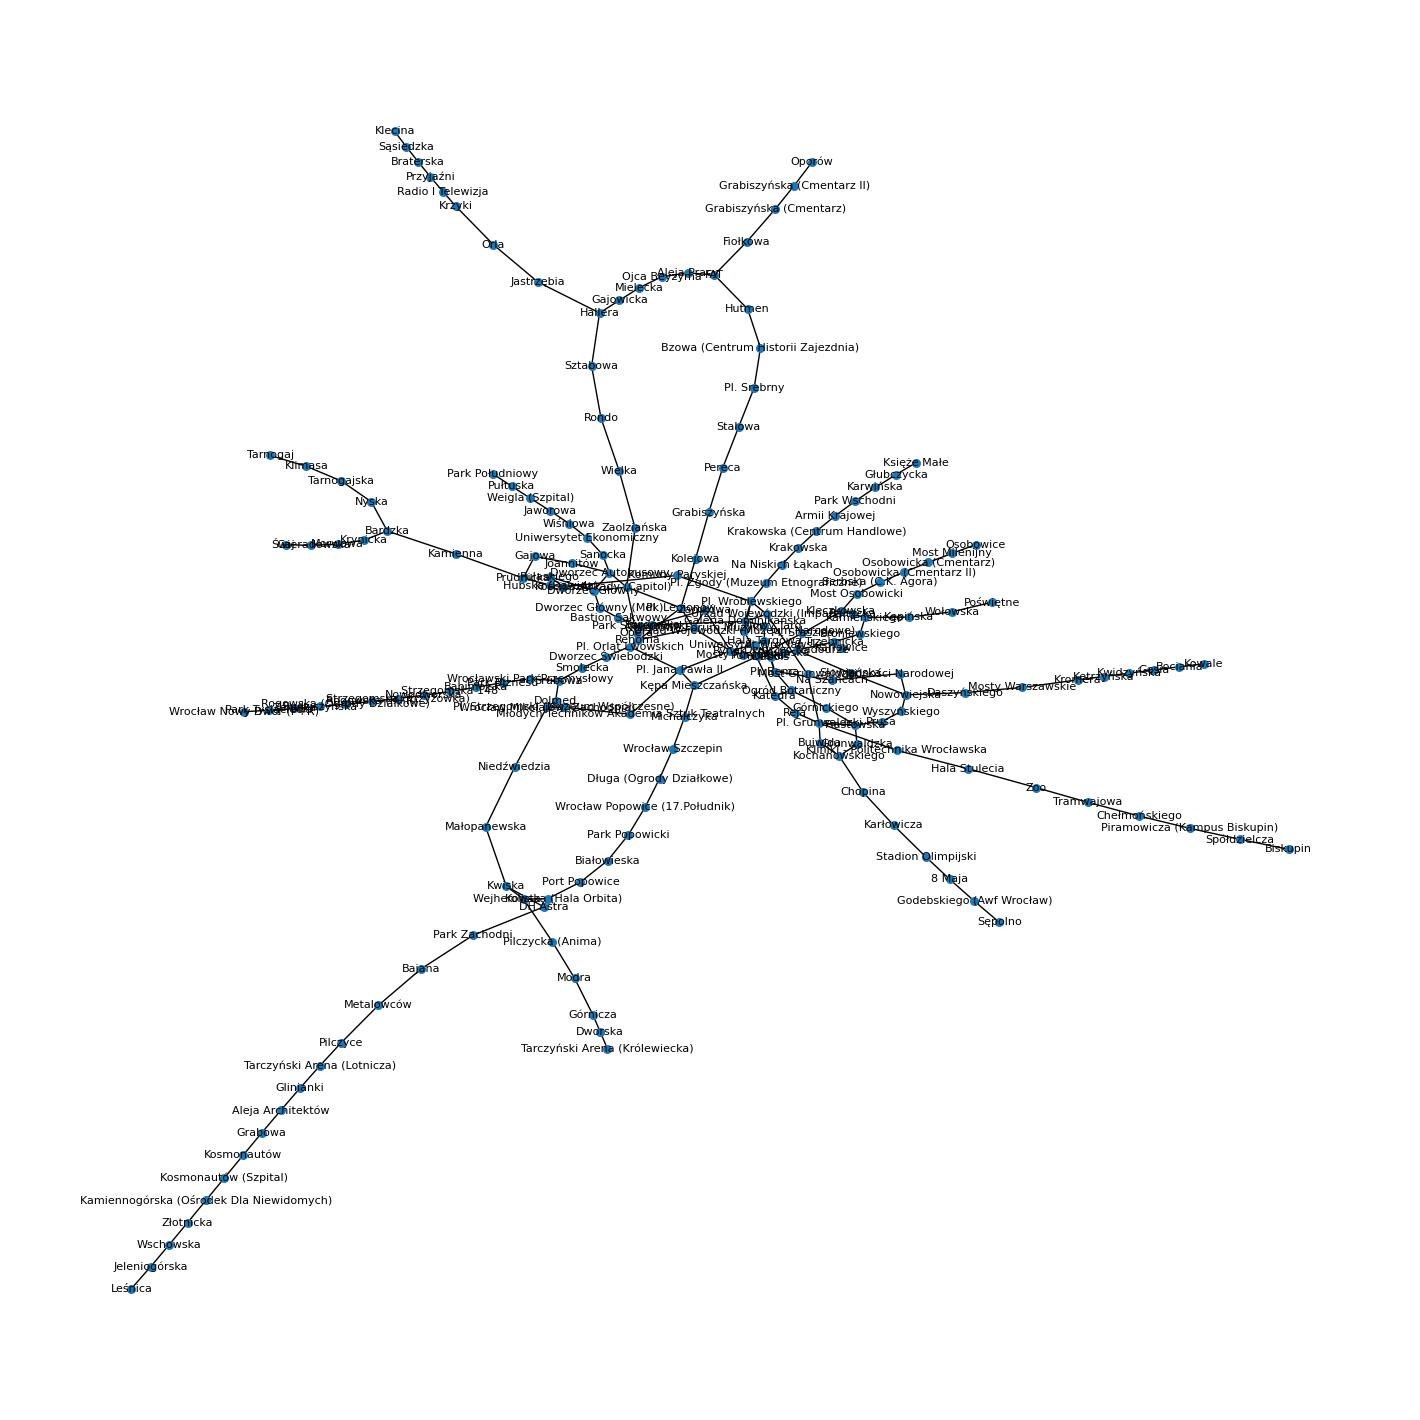

In [ ]:
plt.figure(figsize=(14, 14))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30, font_size=8)

plt.show()

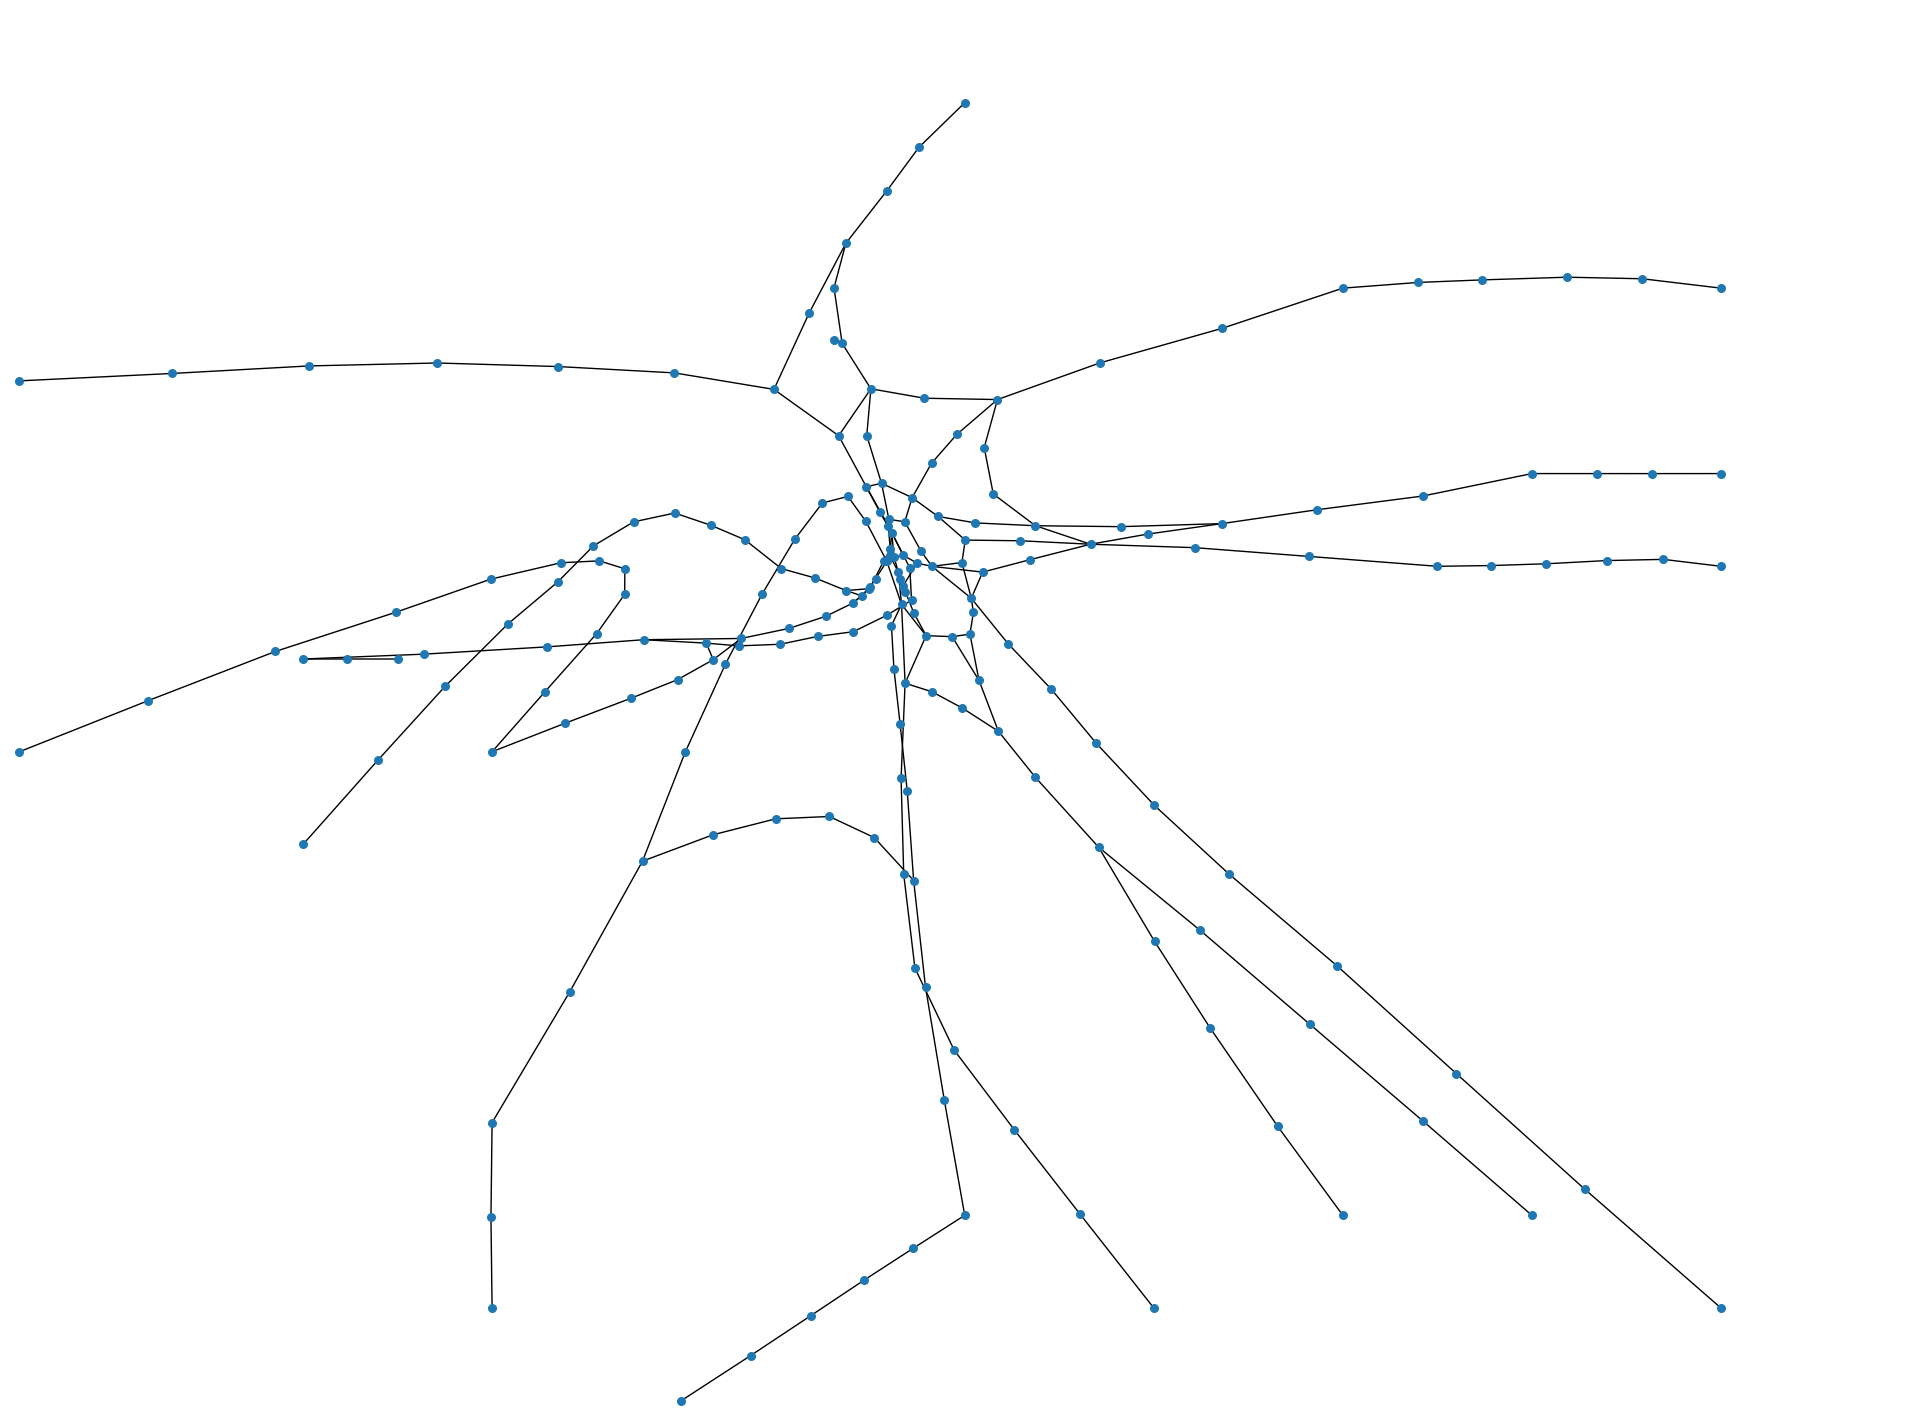

In [78]:
plt.figure(figsize=(19, 14))

fixed_positions = {'Poświętne': (100, 140), 'Kowale': (180, 120), 'Kromera': (140, 120), 'Sępolno': (180, 100), 'Stadion Olimpijski': (160, 100), 'Biskupin': (180, 90), 'Zoo': (150, 90), 'Księże Małe': (180, 10), 'Tarnogaj': (160, 20), 'Gaj': (140, 20), 'Park Południowy': (120, 10), 'Krzyki': (100, 20), 'Klecina': (70, 0), 'Oporów': (50, 10), 'Grabiszyńska (Cmentarz)': (50, 30), 'Wrocław Nowy Dwór (P+R)': (30, 60), 'Leśnica': (0, 70), 'Pilczyce': (50, 70), 'Tarczyński Arena (Królewiecka)': (40, 80), 'Górnicza': (30, 80), 'Dokerska': (30, 90), 'Osobowice': (0, 110)}

pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_positions.keys(), scale=5, k=0.001, )
nx.draw(G, pos, with_labels=False, node_size=30, font_size=8)
plt.xlim(-1, 200)  
plt.ylim(-1, 150)
plt.show()



# Teraz trzeba poprawić layout

# Analiza sieci

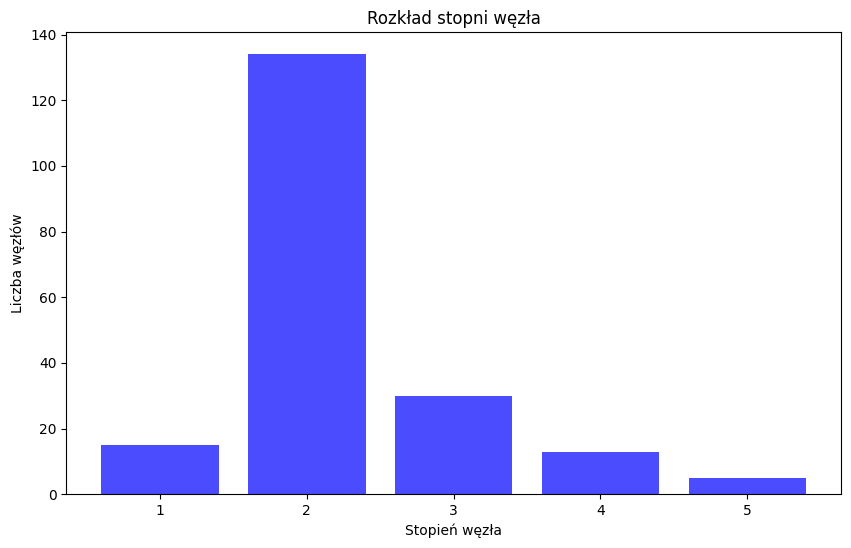

In [12]:
degrees = [deg for _, deg in G.degree()]
degree_counts = Counter(degrees)
plt.figure(figsize=(10, 6))
plt.bar(degree_counts.keys(), degree_counts.values(), color='blue', alpha=0.7)
plt.title("Rozkład stopni węzła")
plt.xlabel("Stopień węzła")
plt.ylabel("Liczba węzłów")
plt.show()


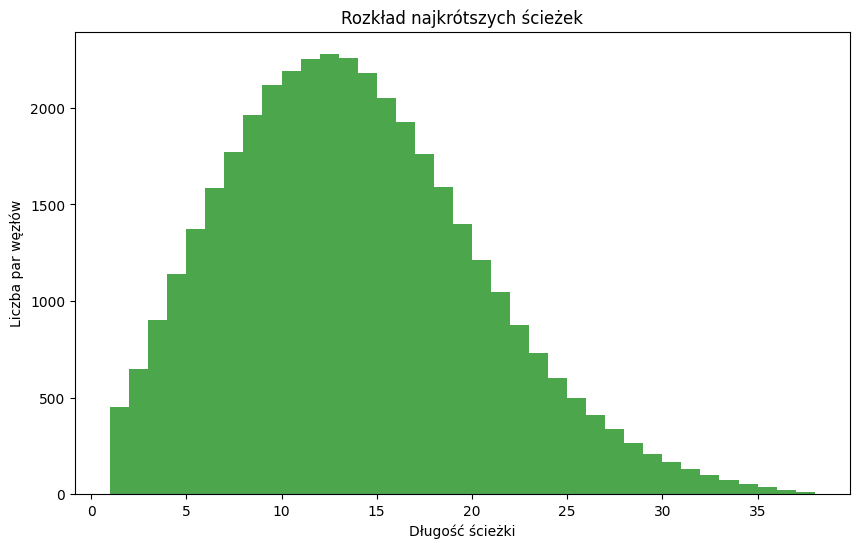

In [13]:
shortest_paths = dict(nx.shortest_path_length(G))
path_lengths = [length for target_dict in shortest_paths.values() for length in target_dict.values()]
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=range(1, max(path_lengths) + 1), color='green', alpha=0.7)
plt.title("Rozkład najkrótszych ścieżek")
plt.xlabel("Długość ścieżki")
plt.ylabel("Liczba par węzłów")
plt.show()

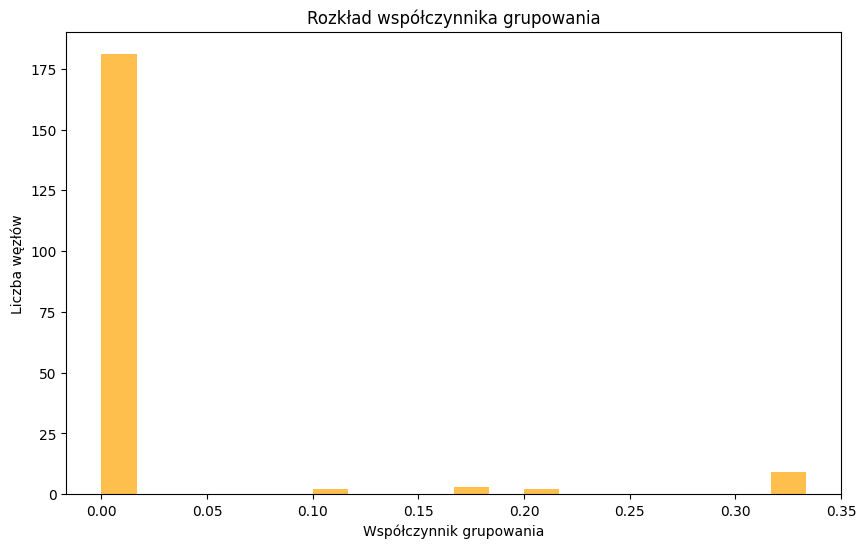

In [14]:
clustering_coeffs = nx.clustering(G)
plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs.values(), bins=20, color='orange', alpha=0.7)
plt.title("Rozkład współczynnika grupowania")
plt.xlabel("Współczynnik grupowania")
plt.ylabel("Liczba węzłów")
plt.show()

In [15]:
largest_component = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print(f"Średnica sieci: {diameter}")


Średnica sieci: 38


In [16]:
num_components = nx.number_connected_components(G)
print(f"Liczba komponentów: {num_components}")


Liczba komponentów: 1


In [17]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


In [18]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]


In [19]:
print("Top 5 węzłów według centralności stopnia:", top_degree)
print("Top 5 węzłów według centralności pośrednictwa:", top_betweenness)
print("Top 5 węzłów według centralności bliskości:", top_closeness)


Top 5 węzłów według centralności stopnia: [('Pl. Grunwaldzki', 0.02551020408163265), ('Pl. Wróblewskiego', 0.02551020408163265), ('Arkady (Capitol)', 0.02551020408163265), ('Galeria Dominikańska', 0.02551020408163265), ('Rynek', 0.02551020408163265)]
Top 5 węzłów według centralności pośrednictwa: [('Pl. Jana Pawła II', 0.3426174383788195), ('Arkady (Capitol)', 0.2847624837224522), ('Pl. Orląt Lwowskich', 0.24757653823587916), ('Młodych Techników Akademia Sztuk Teatralnych', 0.239606425320711), ('Pl. Strzegomski (Muzeum Współczesne)', 0.2339549339549339)]
Top 5 węzłów według centralności bliskości: [('Pl. Jana Pawła II', 0.12173913043478261), ('Rynek', 0.12166356300434512), ('Narodowe Forum Muzyki', 0.11995104039167687), ('Pl. Legionów', 0.1192214111922141), ('Pl. Orląt Lwowskich', 0.11871592973955179)]


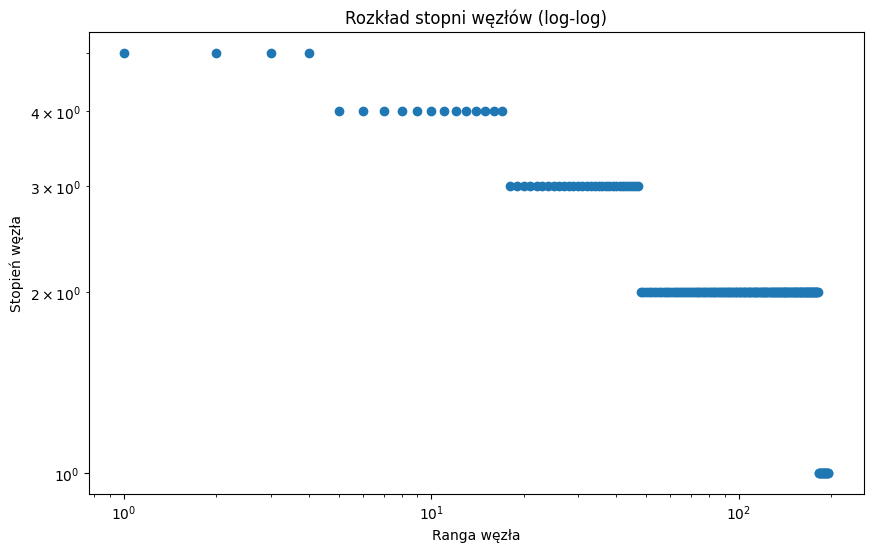

In [20]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(10, 6))
plt.loglog(degree_sequence, marker="o", linestyle="")
plt.title("Rozkład stopni węzłów (log-log)")
plt.xlabel("Ranga węzła")
plt.ylabel("Stopień węzła")
plt.show()

# Detekcja grup w sieci

In [23]:
from networkx.algorithms.community import louvain_communities, girvan_newman

# 1. Algorytm Louvaina
louvain_groups = louvain_communities(G)
print(f"Liczba grup (Louvain): {len(louvain_groups)}")
print("Wielkości grup (Louvain):", [len(group) for group in louvain_groups])


Liczba grup (Louvain): 14
Wielkości grup (Louvain): [17, 16, 12, 9, 11, 12, 11, 14, 23, 9, 16, 6, 19, 22]


In [24]:
# 2. Algorytm Girvan-Newmana
gn_communities = next(girvan_newman(G)) 
gn_groups = [list(group) for group in gn_communities]
print(f"Liczba grup (Girvan-Newman): {len(gn_groups)}")
print("Wielkości grup (Girvan-Newman):", [len(group) for group in gn_groups])


Liczba grup (Girvan-Newman): 2
Wielkości grup (Girvan-Newman): [145, 52]


In [26]:
group_map = {node: idx for idx, group in enumerate(louvain_groups) for node in group}
inter_group_edges = [
    (u, v) for u, v in G.edges() if group_map[u] != group_map[v]
]
print(f"Liczba krawędzi między grupami (Louvain): {len(inter_group_edges)}")


Liczba krawędzi między grupami (Louvain): 36


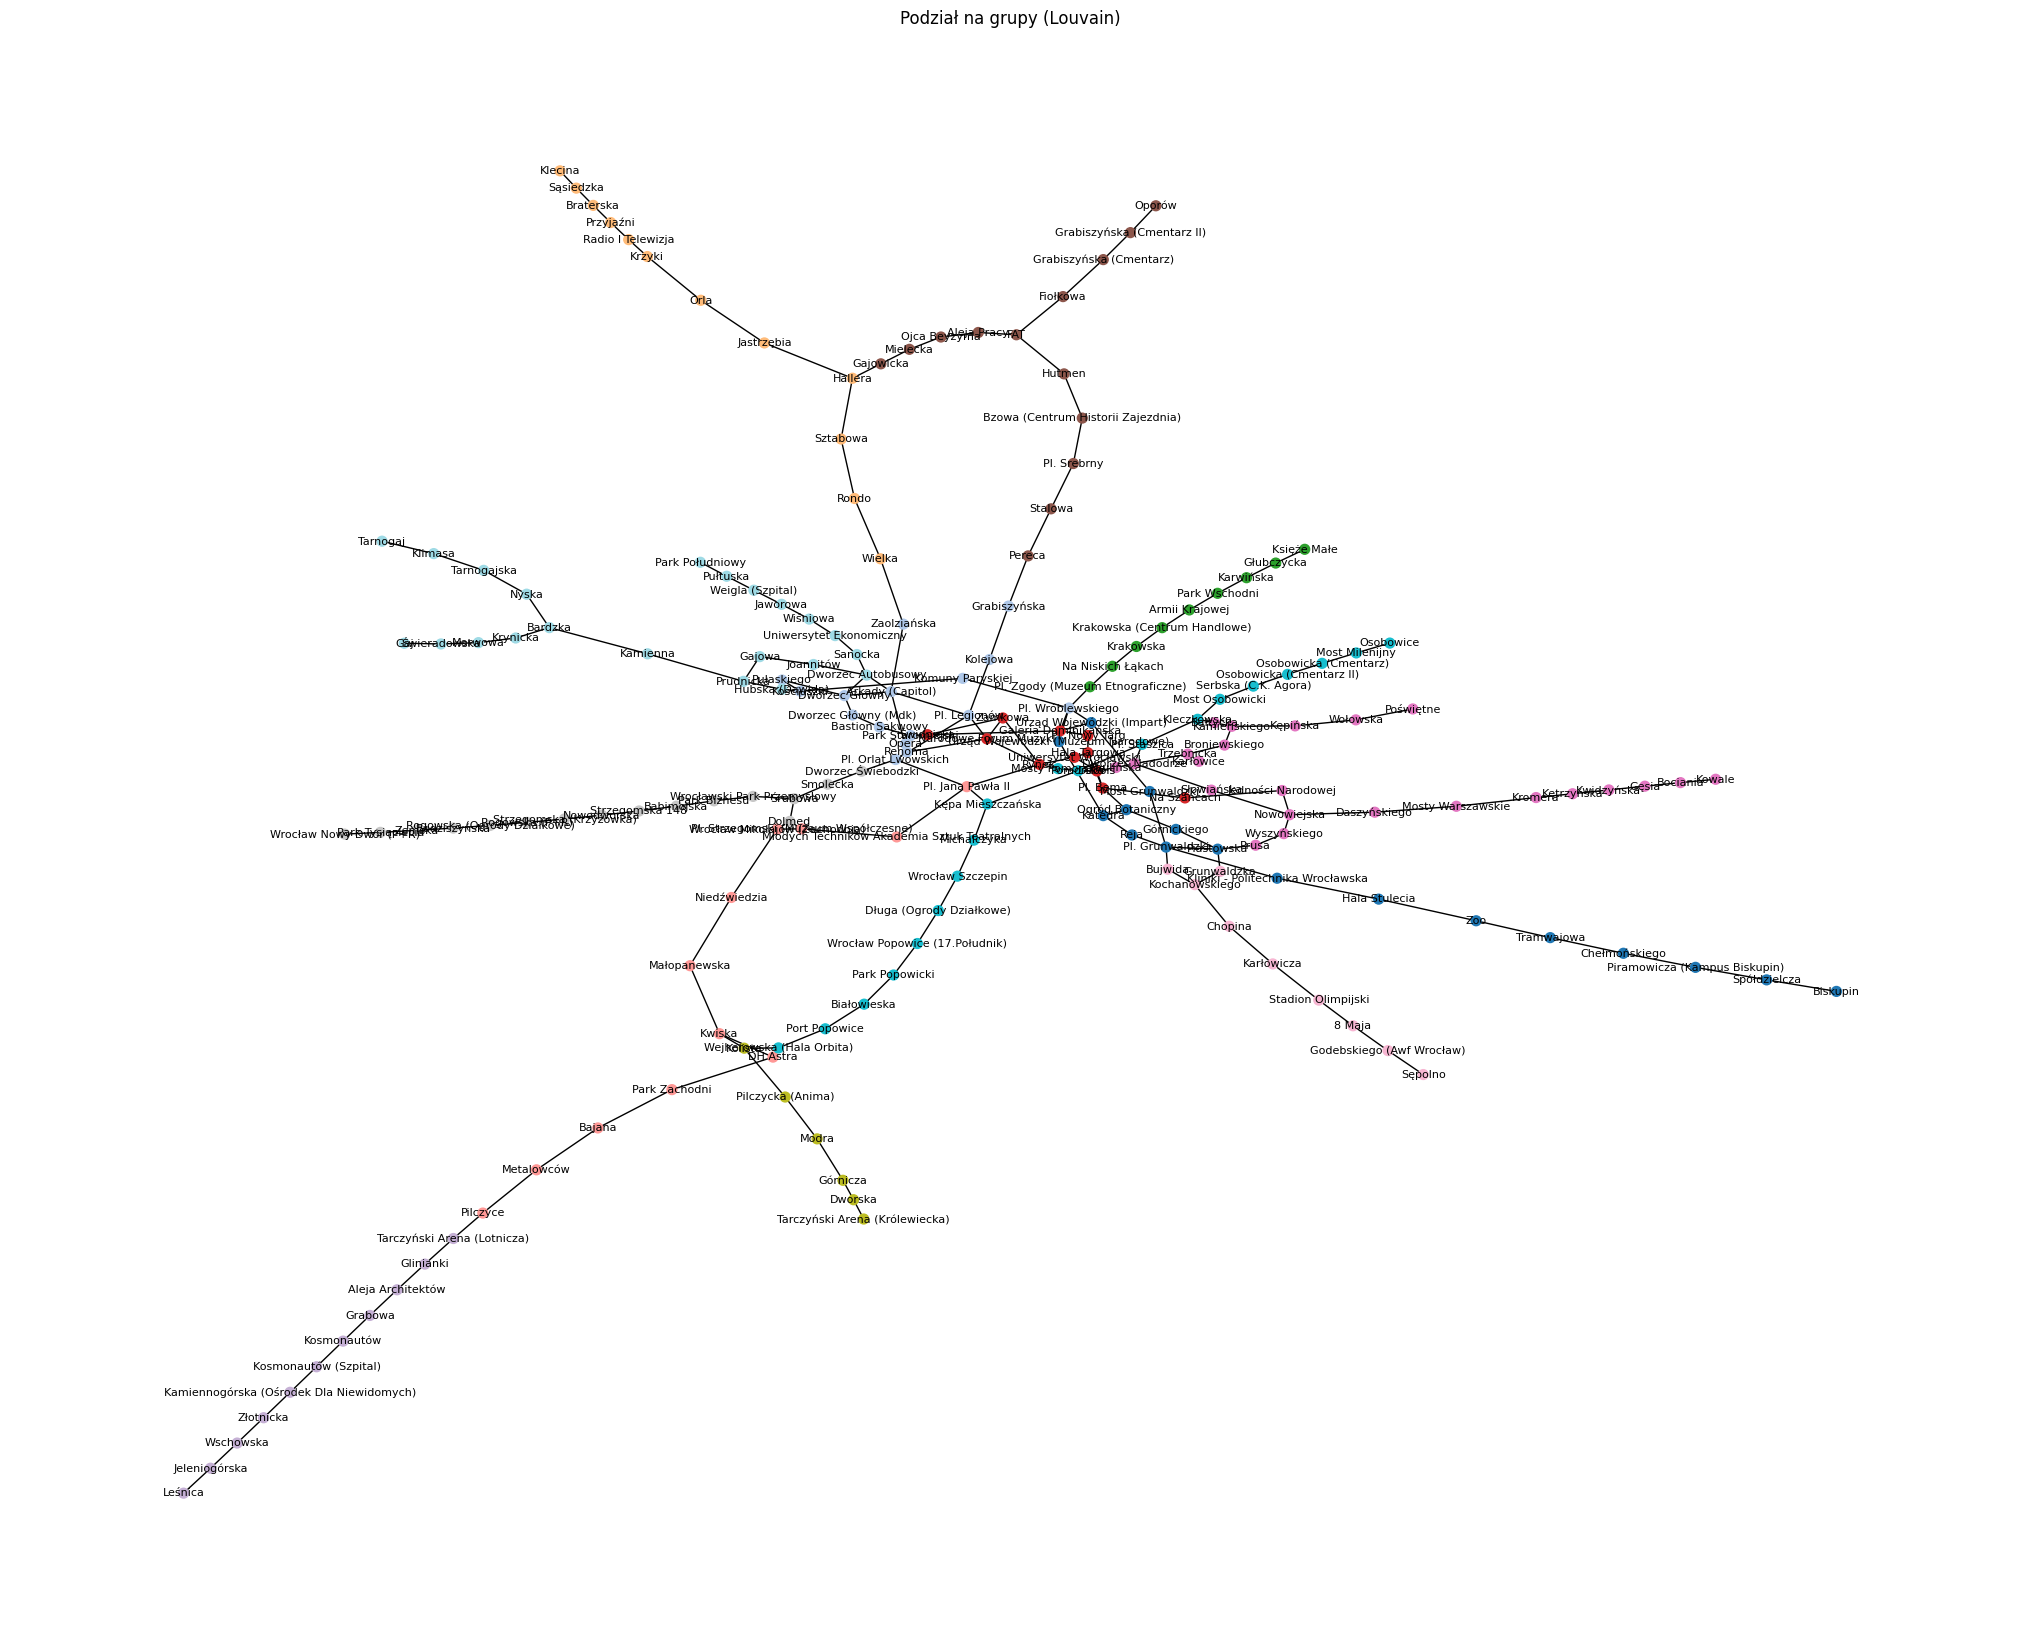

In [40]:
plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(G, scale=4)
colors = [group_map[node] for node in G.nodes()]
nx.draw(
    G, pos, node_color=colors, with_labels=True, labels={node: node for node in G.nodes()},
    node_size=50, cmap=plt.cm.tab20, font_size=8,
)
plt.title("Podział na grupy (Louvain)")
plt.show()

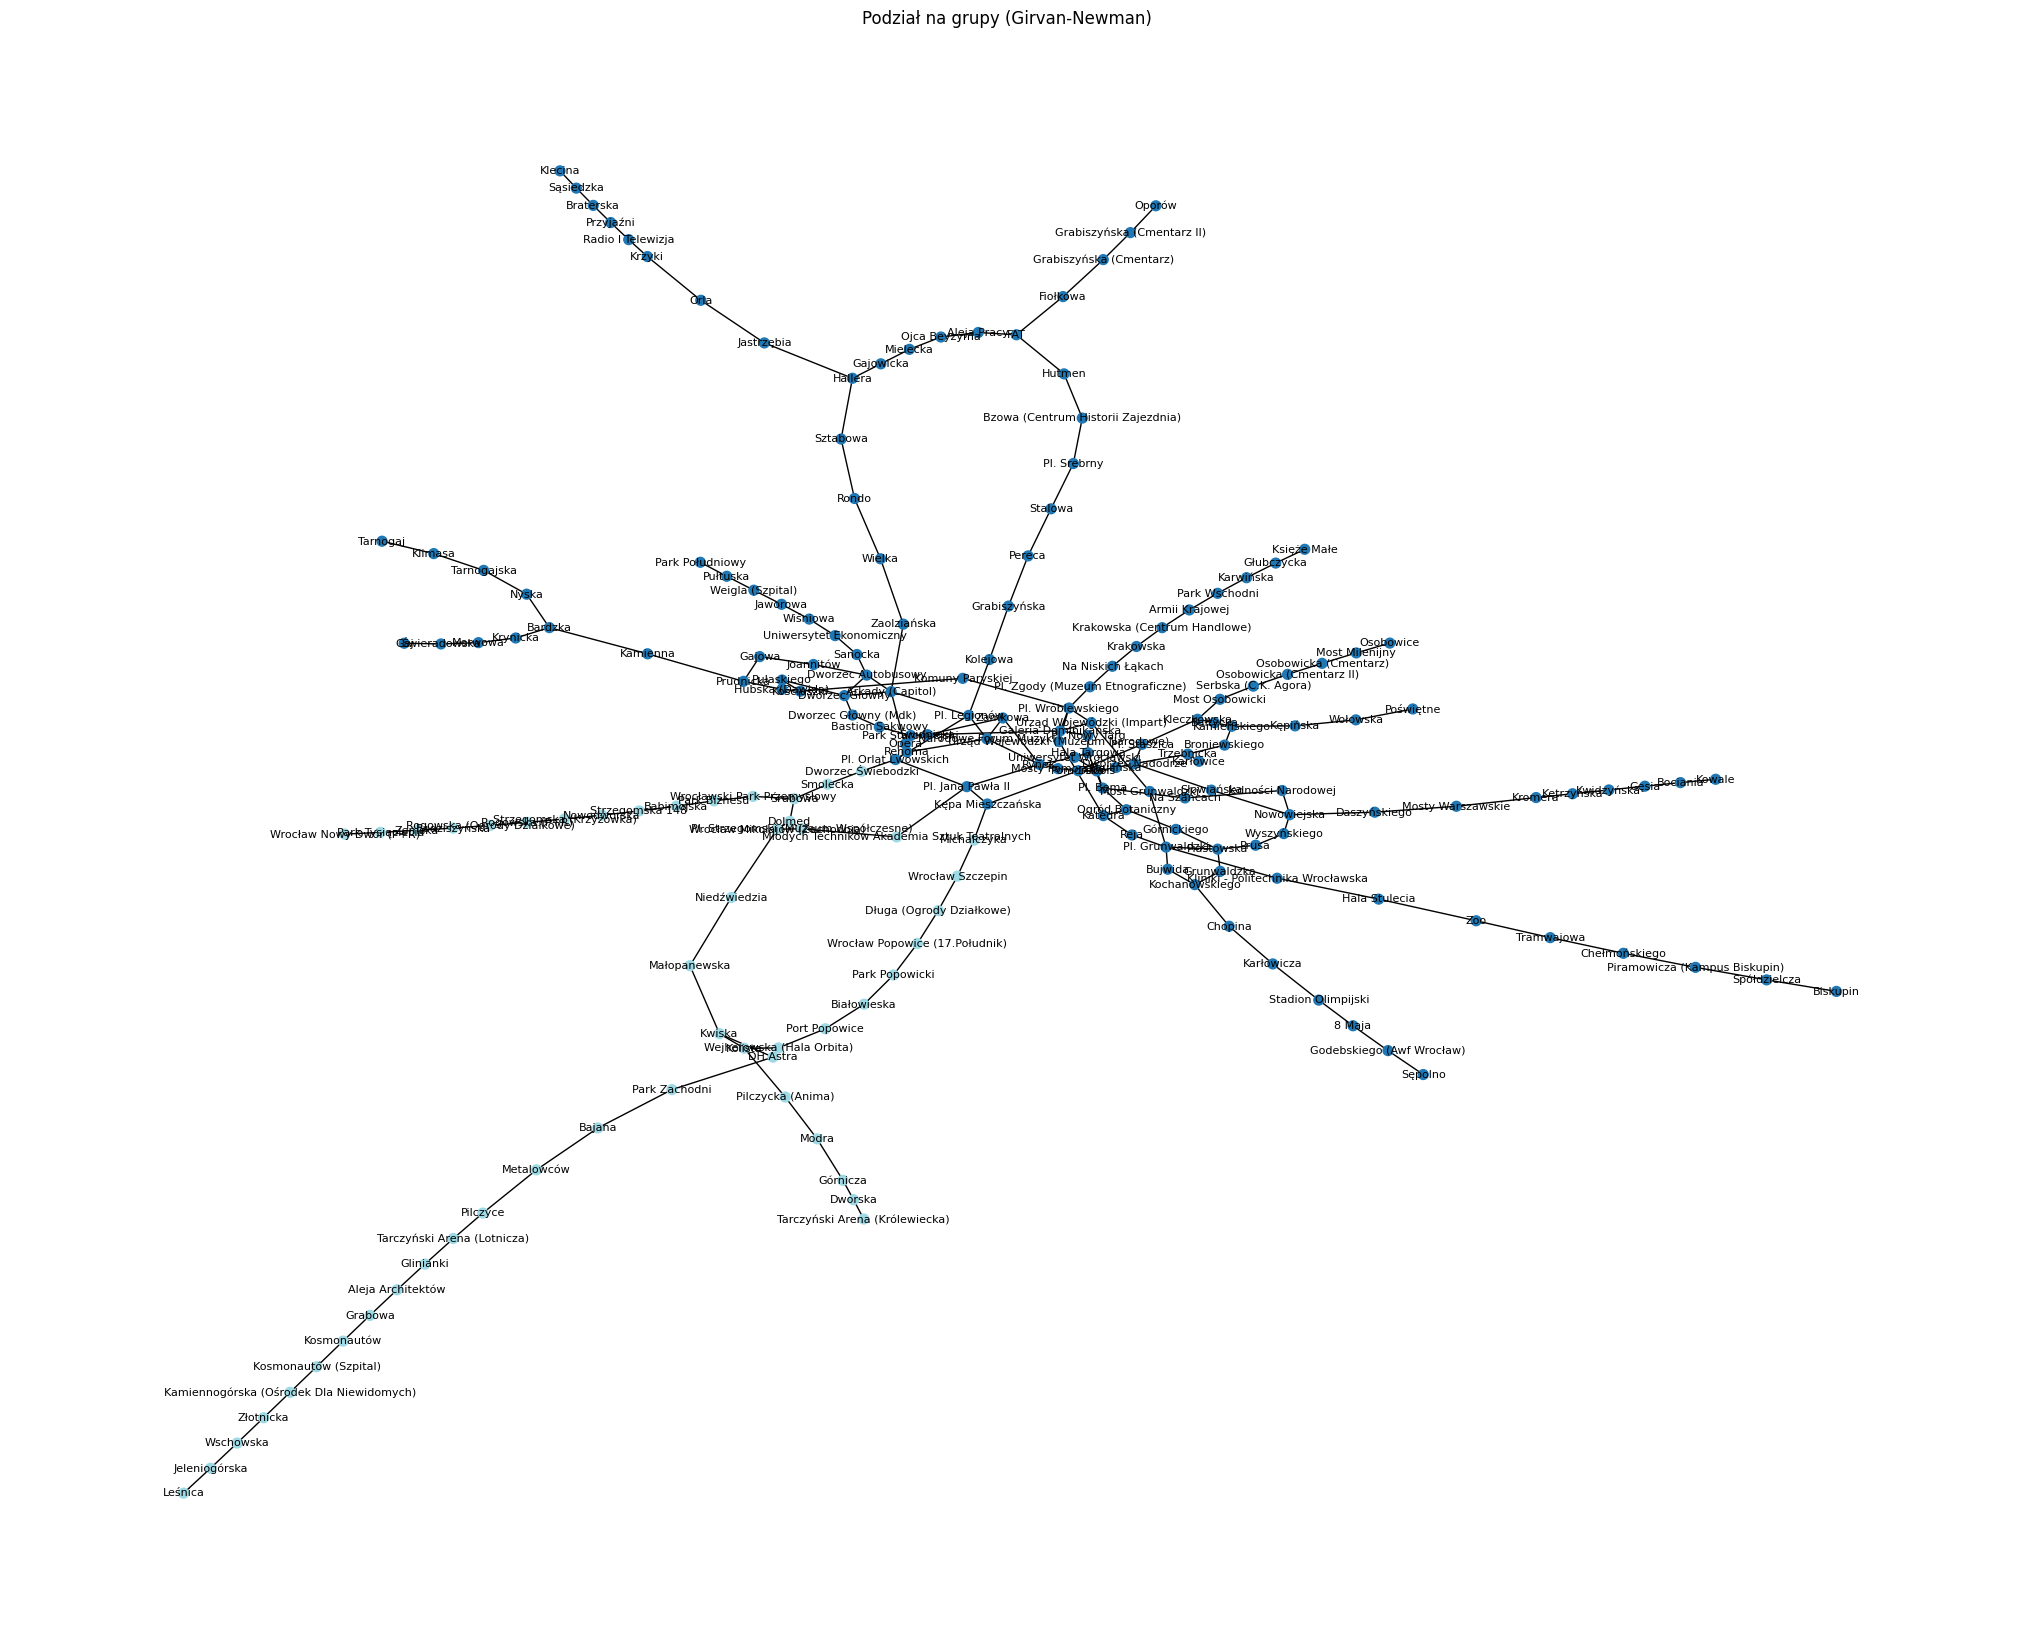

In [42]:
gn_group_map = {}
for idx, group in enumerate(gn_groups):
    for node in group:
        gn_group_map[node] = idx

plt.figure(figsize=(20, 16))
colors_gn = [gn_group_map[node] for node in G.nodes()]
nx.draw(
    G, pos, node_color=colors_gn, with_labels=True, labels={node: node for node in G.nodes()},
    node_size=50, cmap=plt.cm.tab20, font_size=8
)
plt.title("Podział na grupy (Girvan-Newman) ")
plt.show()

# Analiza wizualna sieci

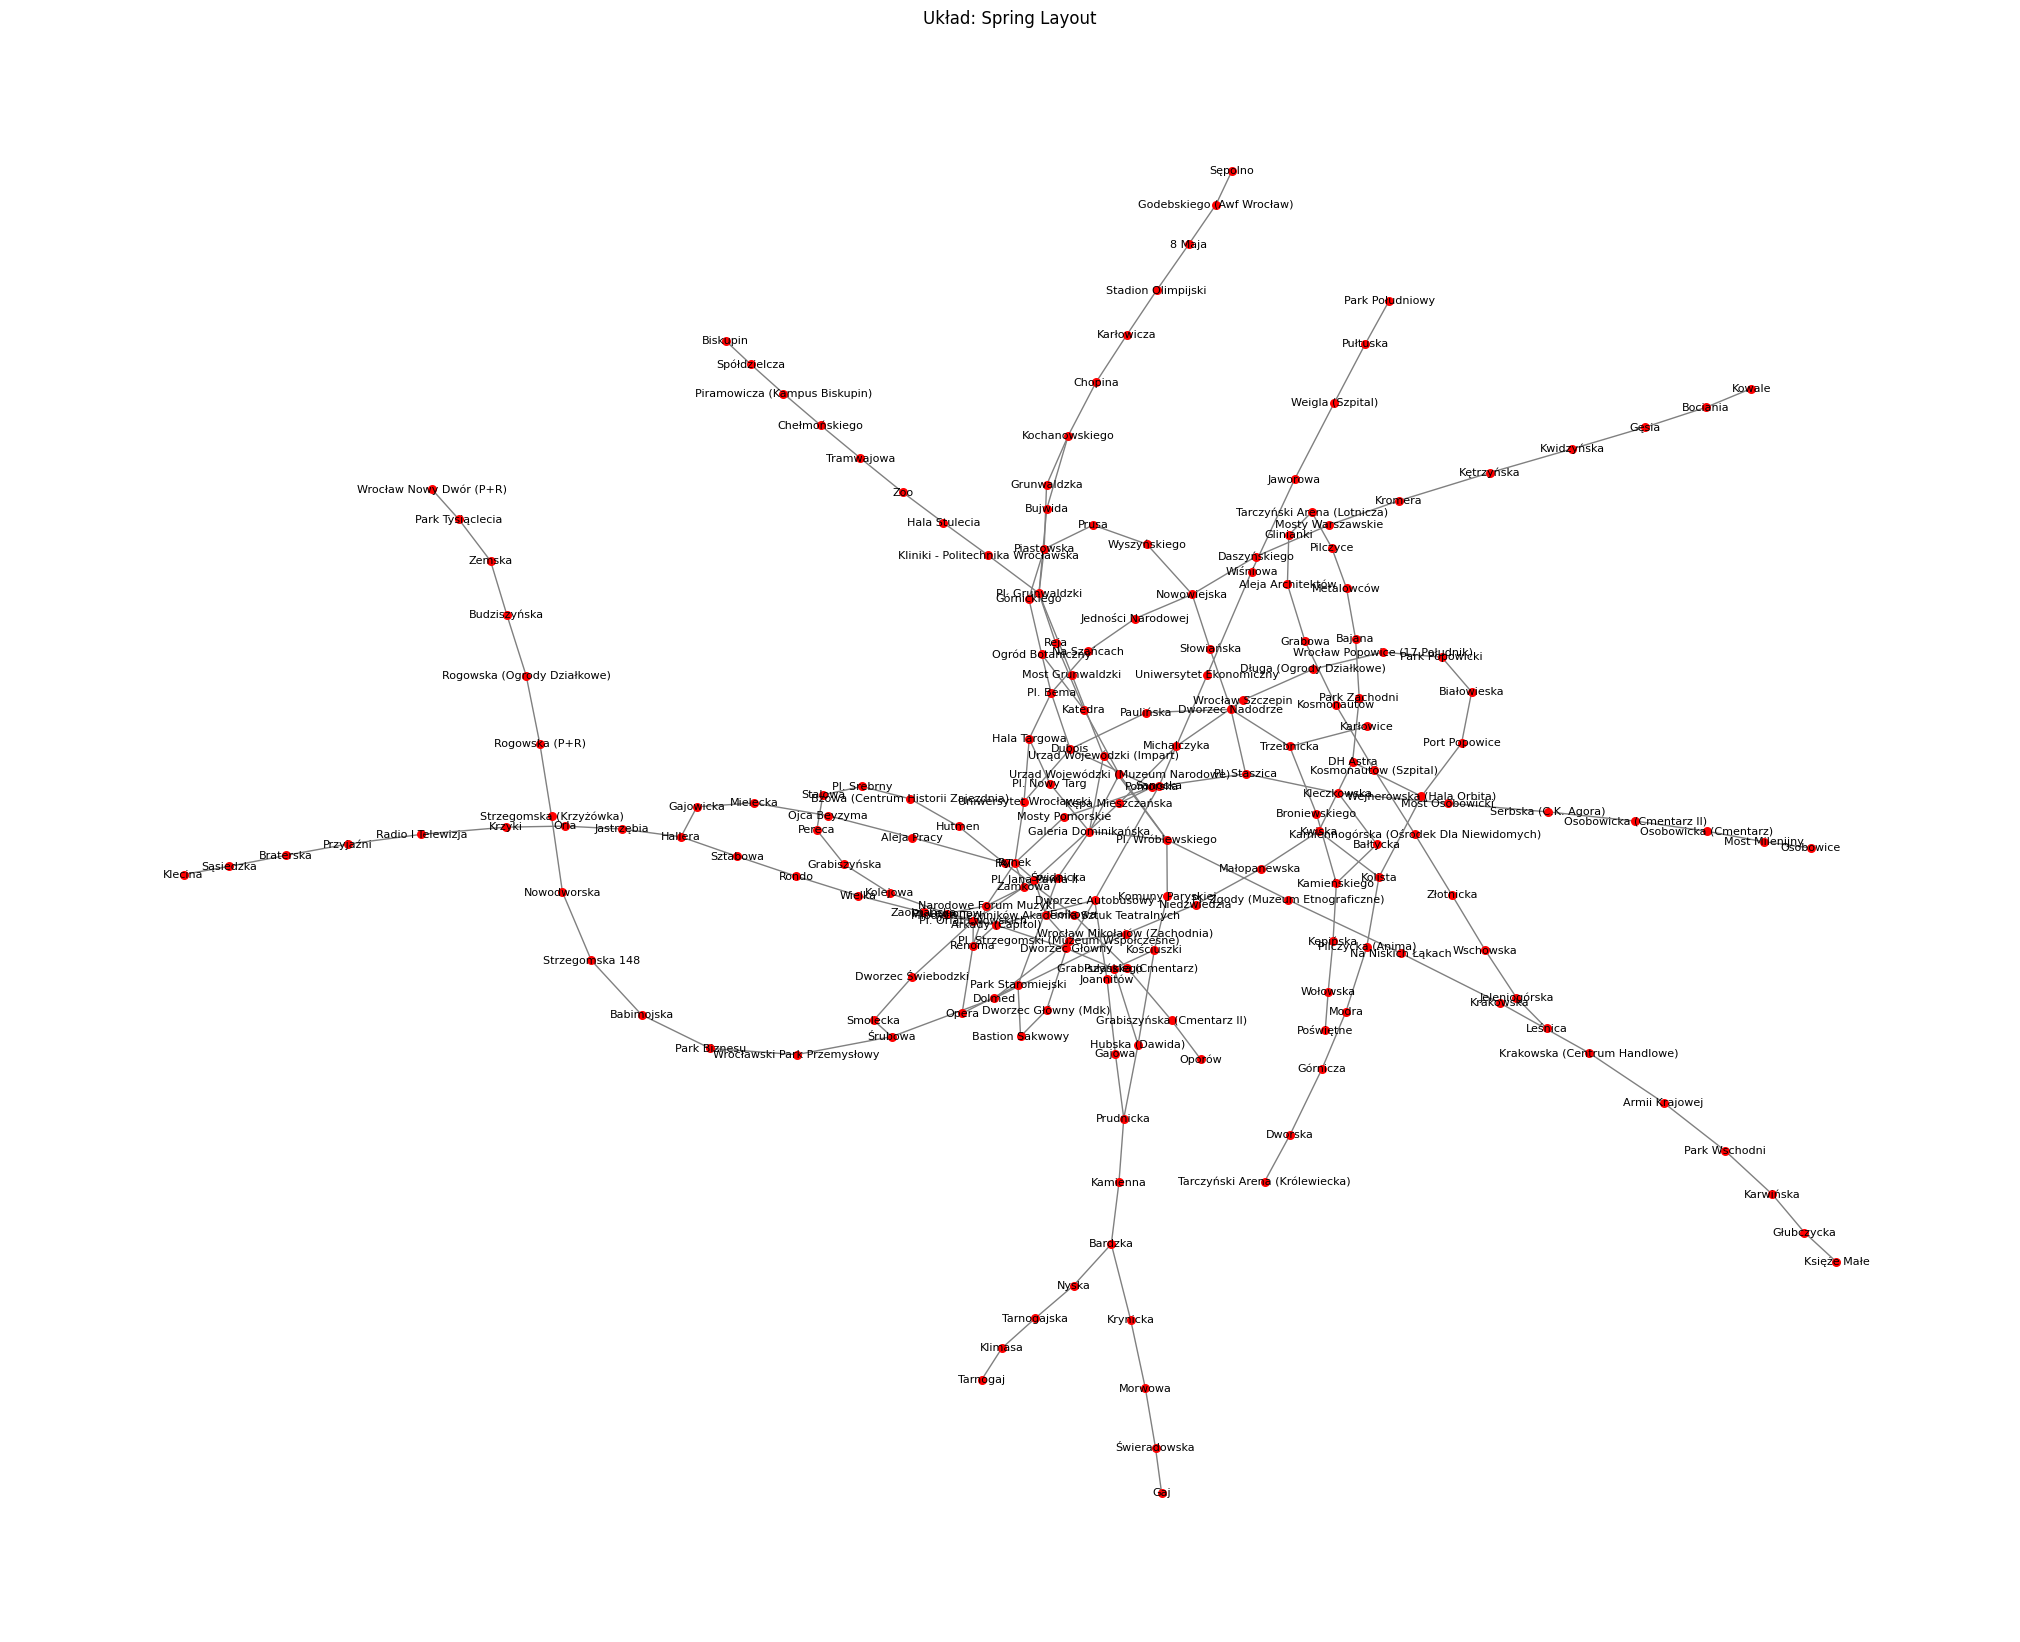

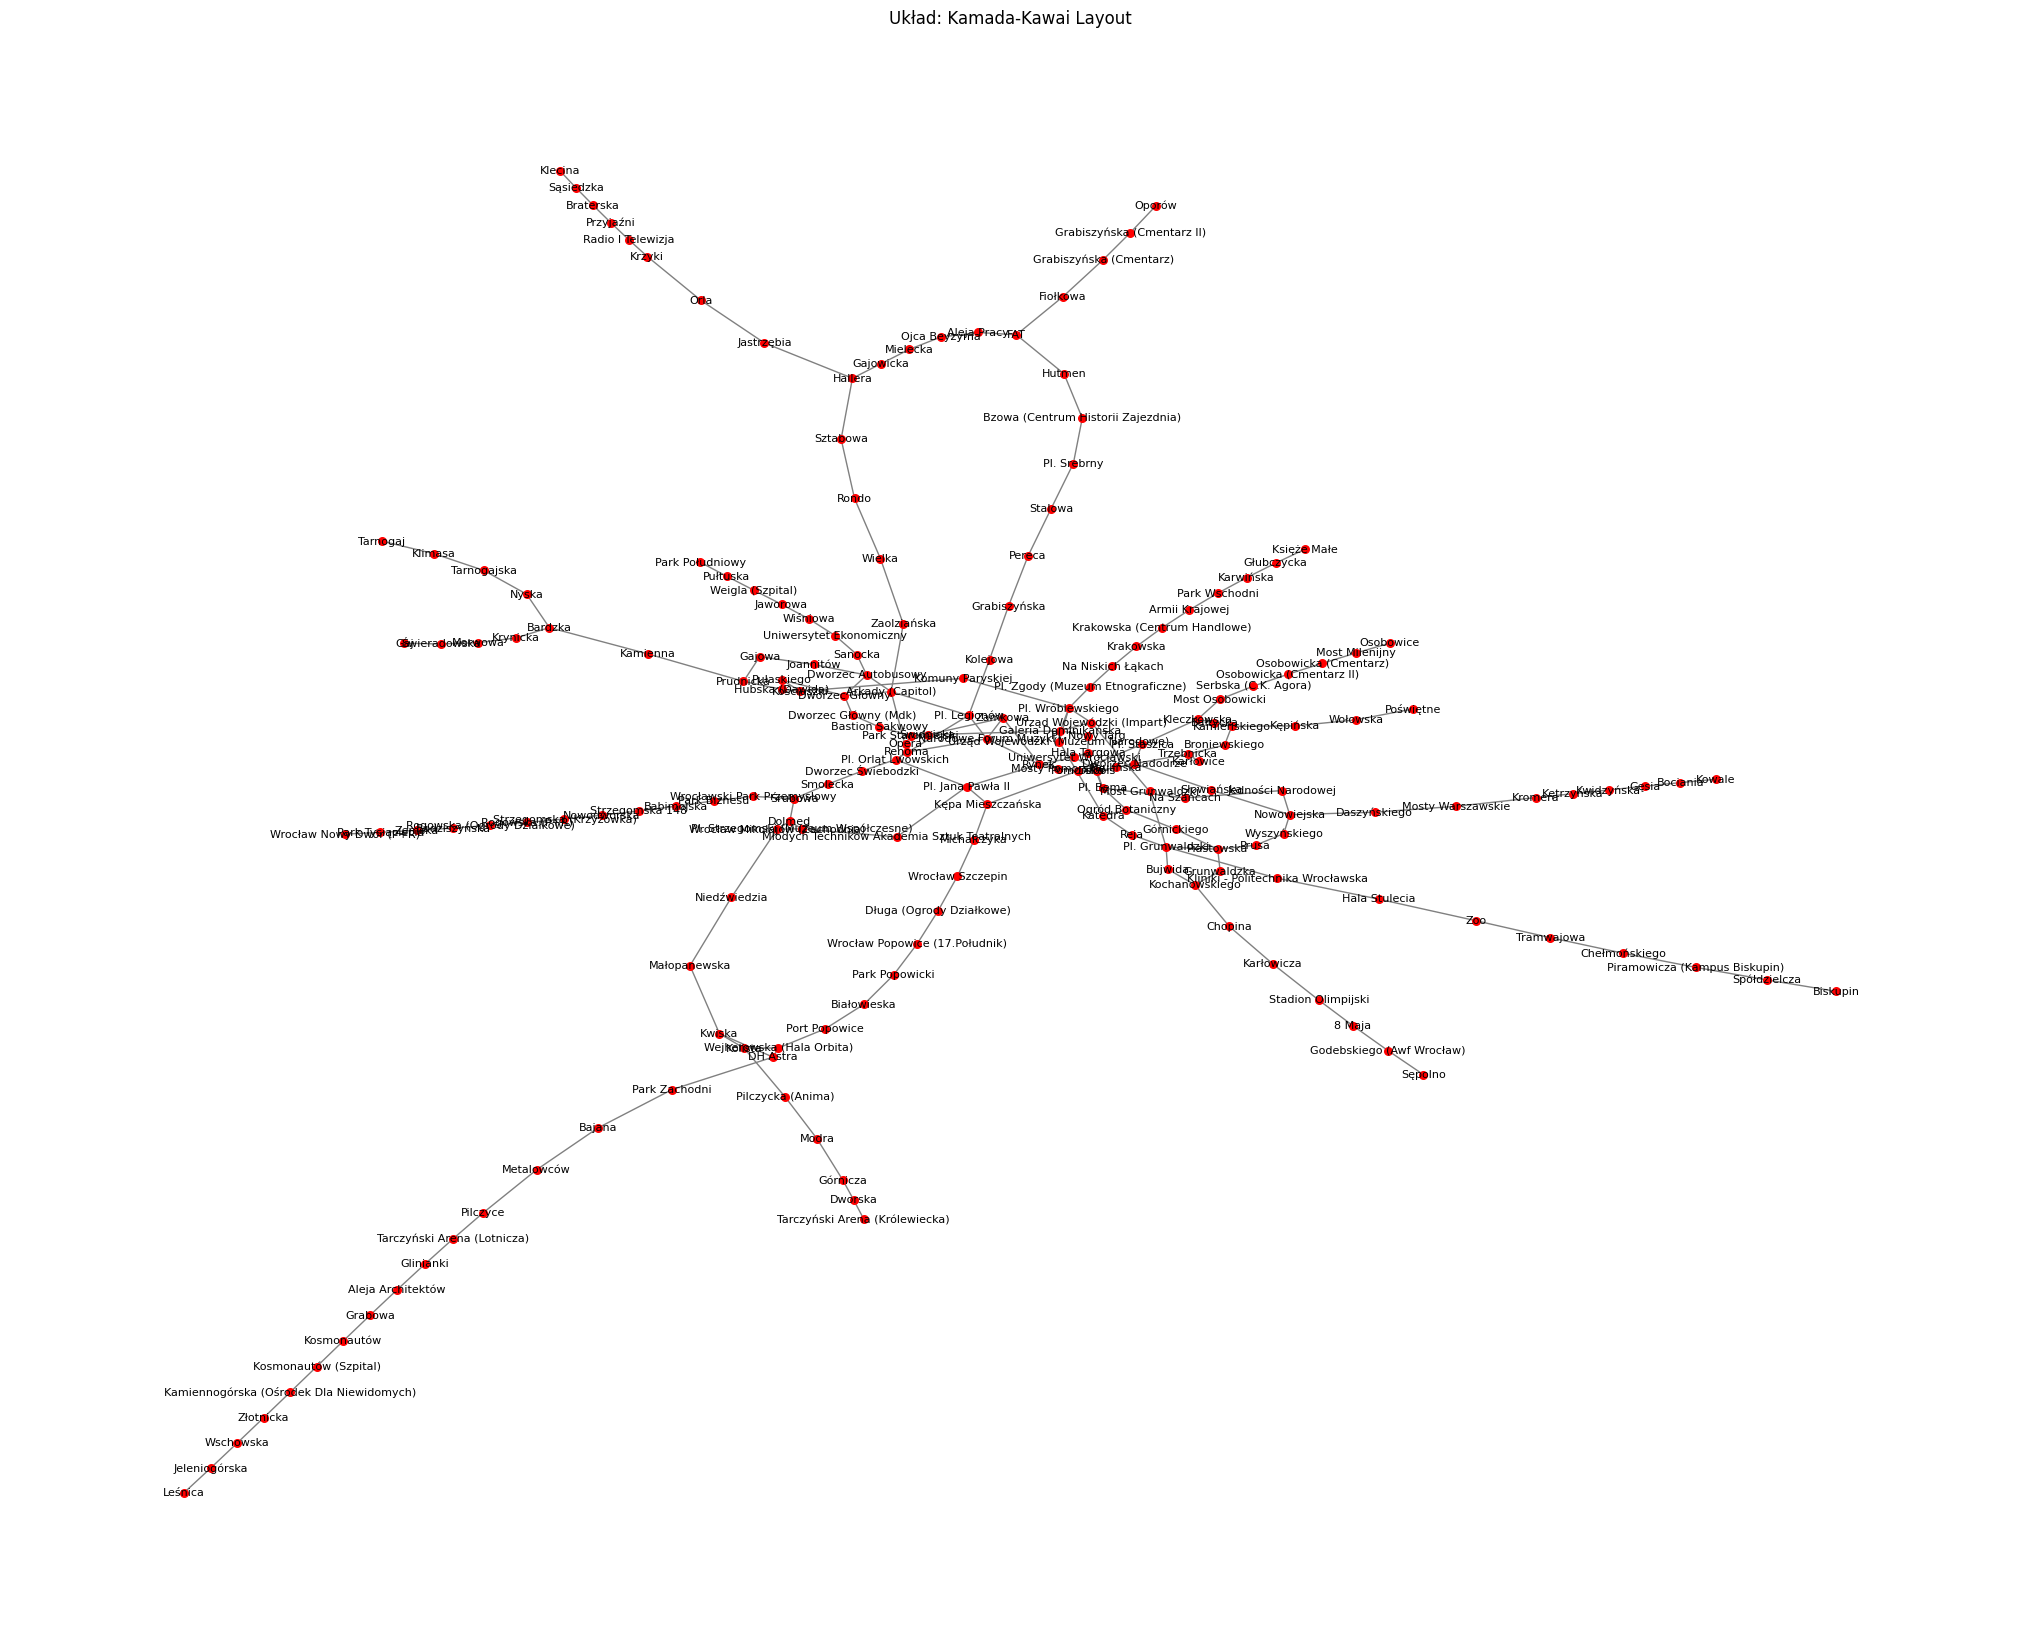

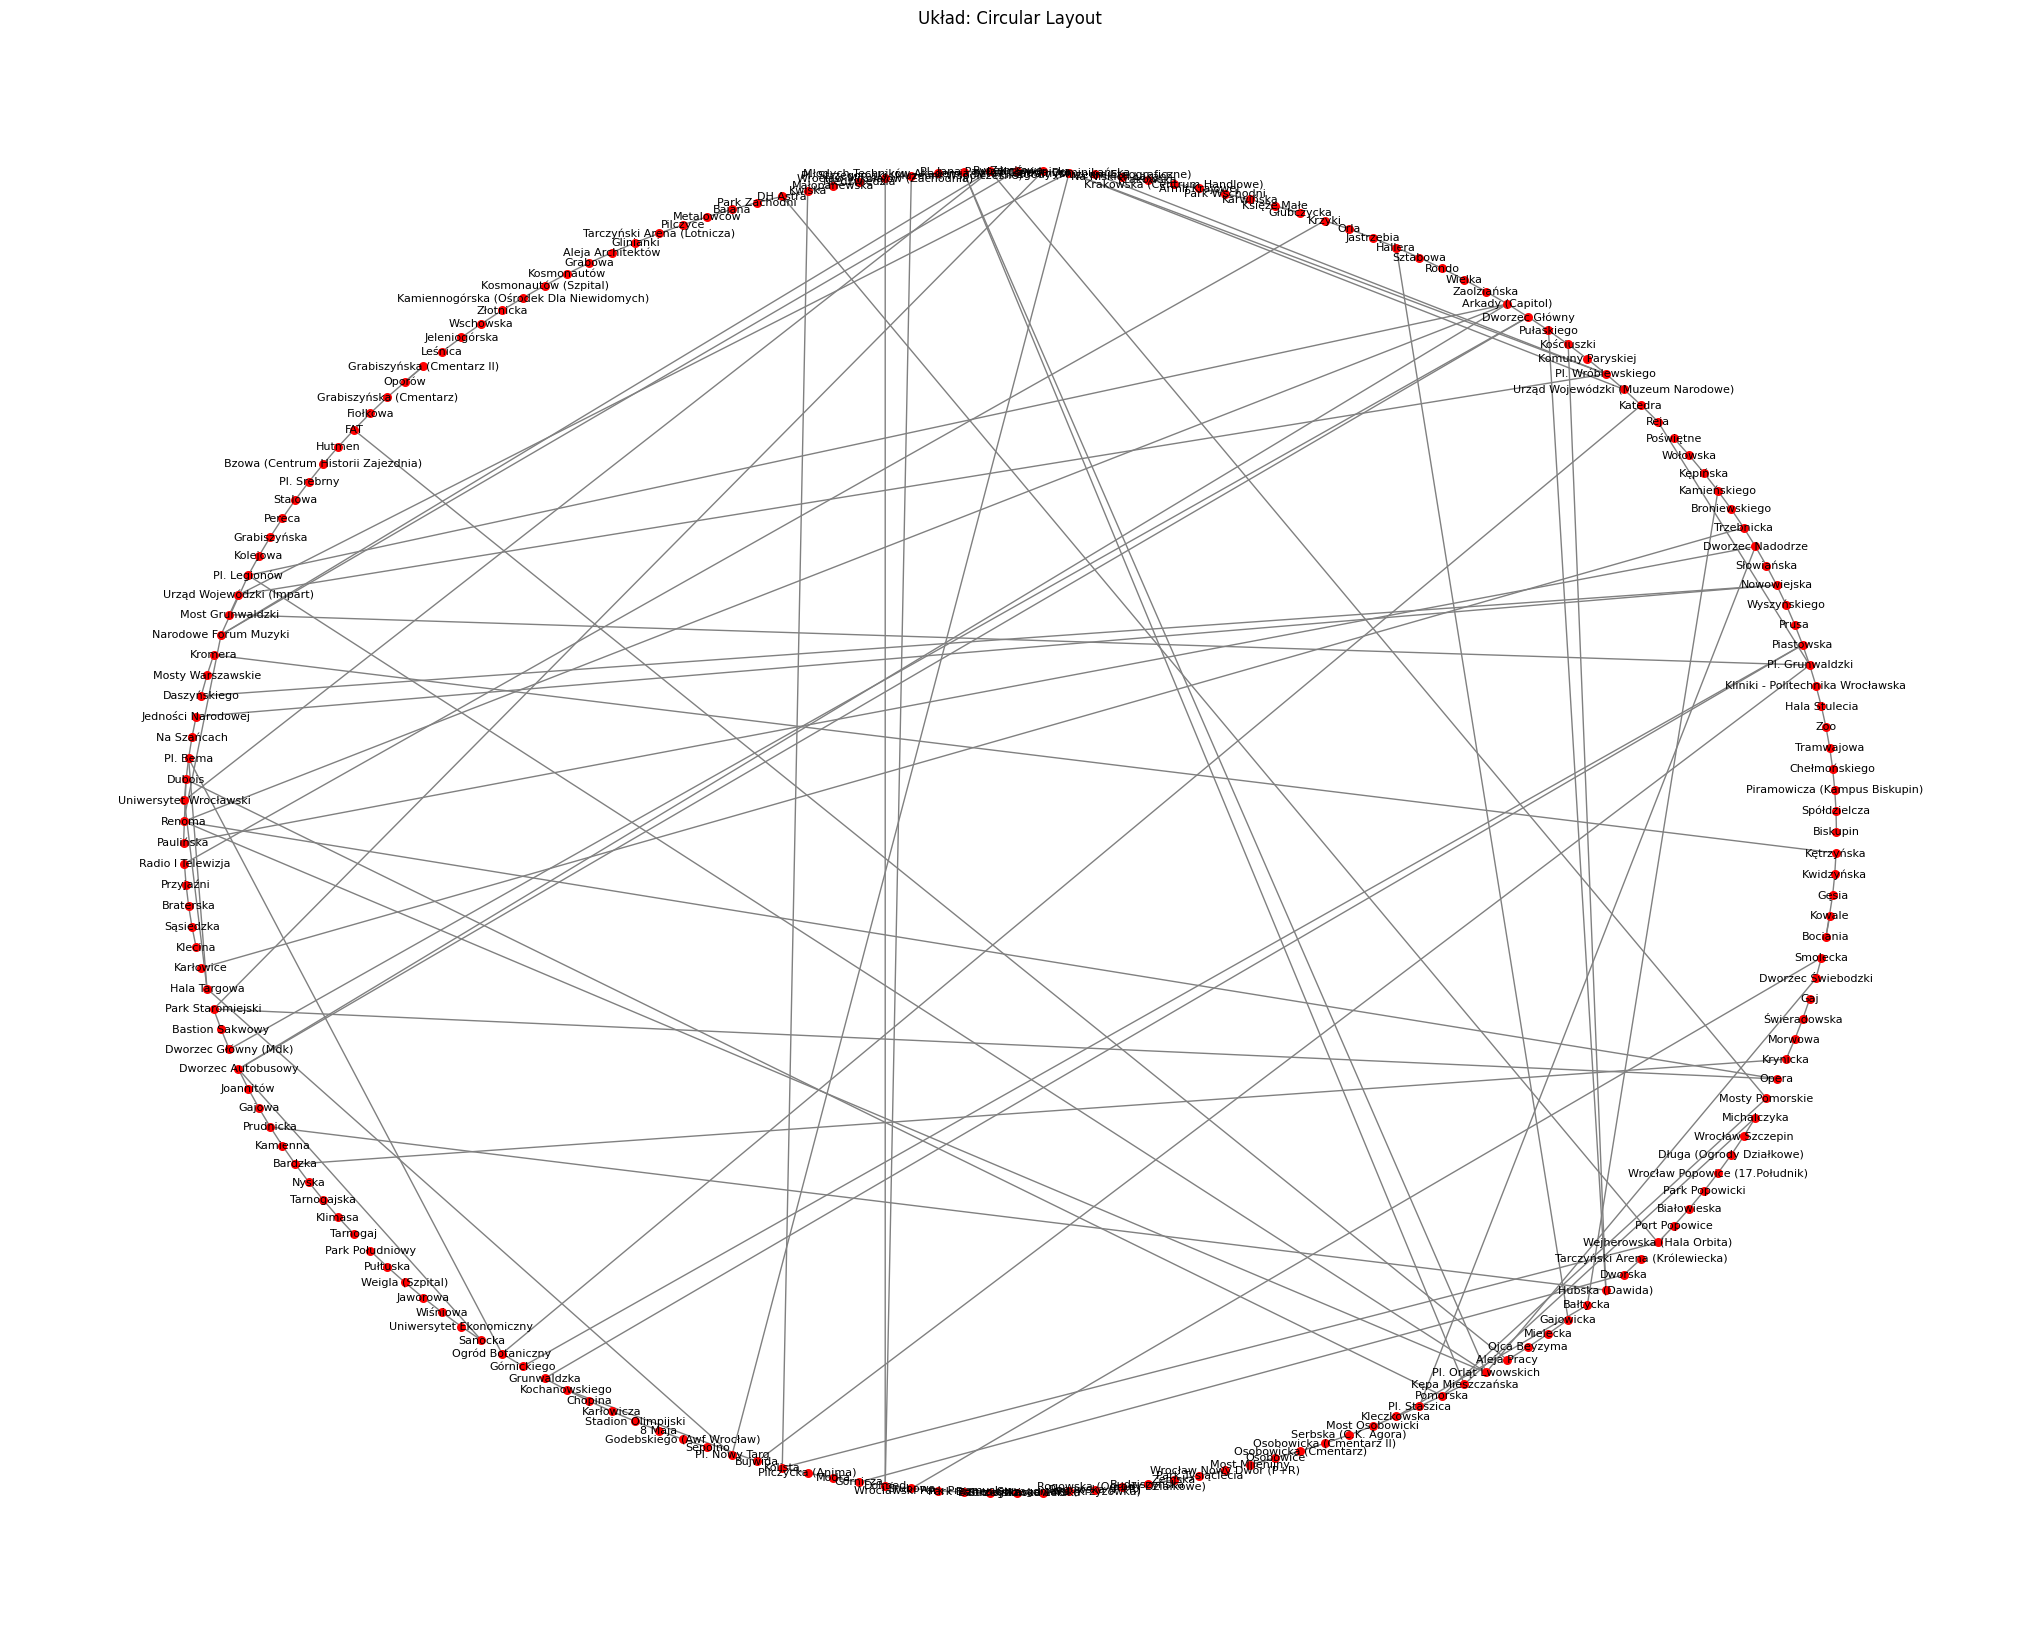

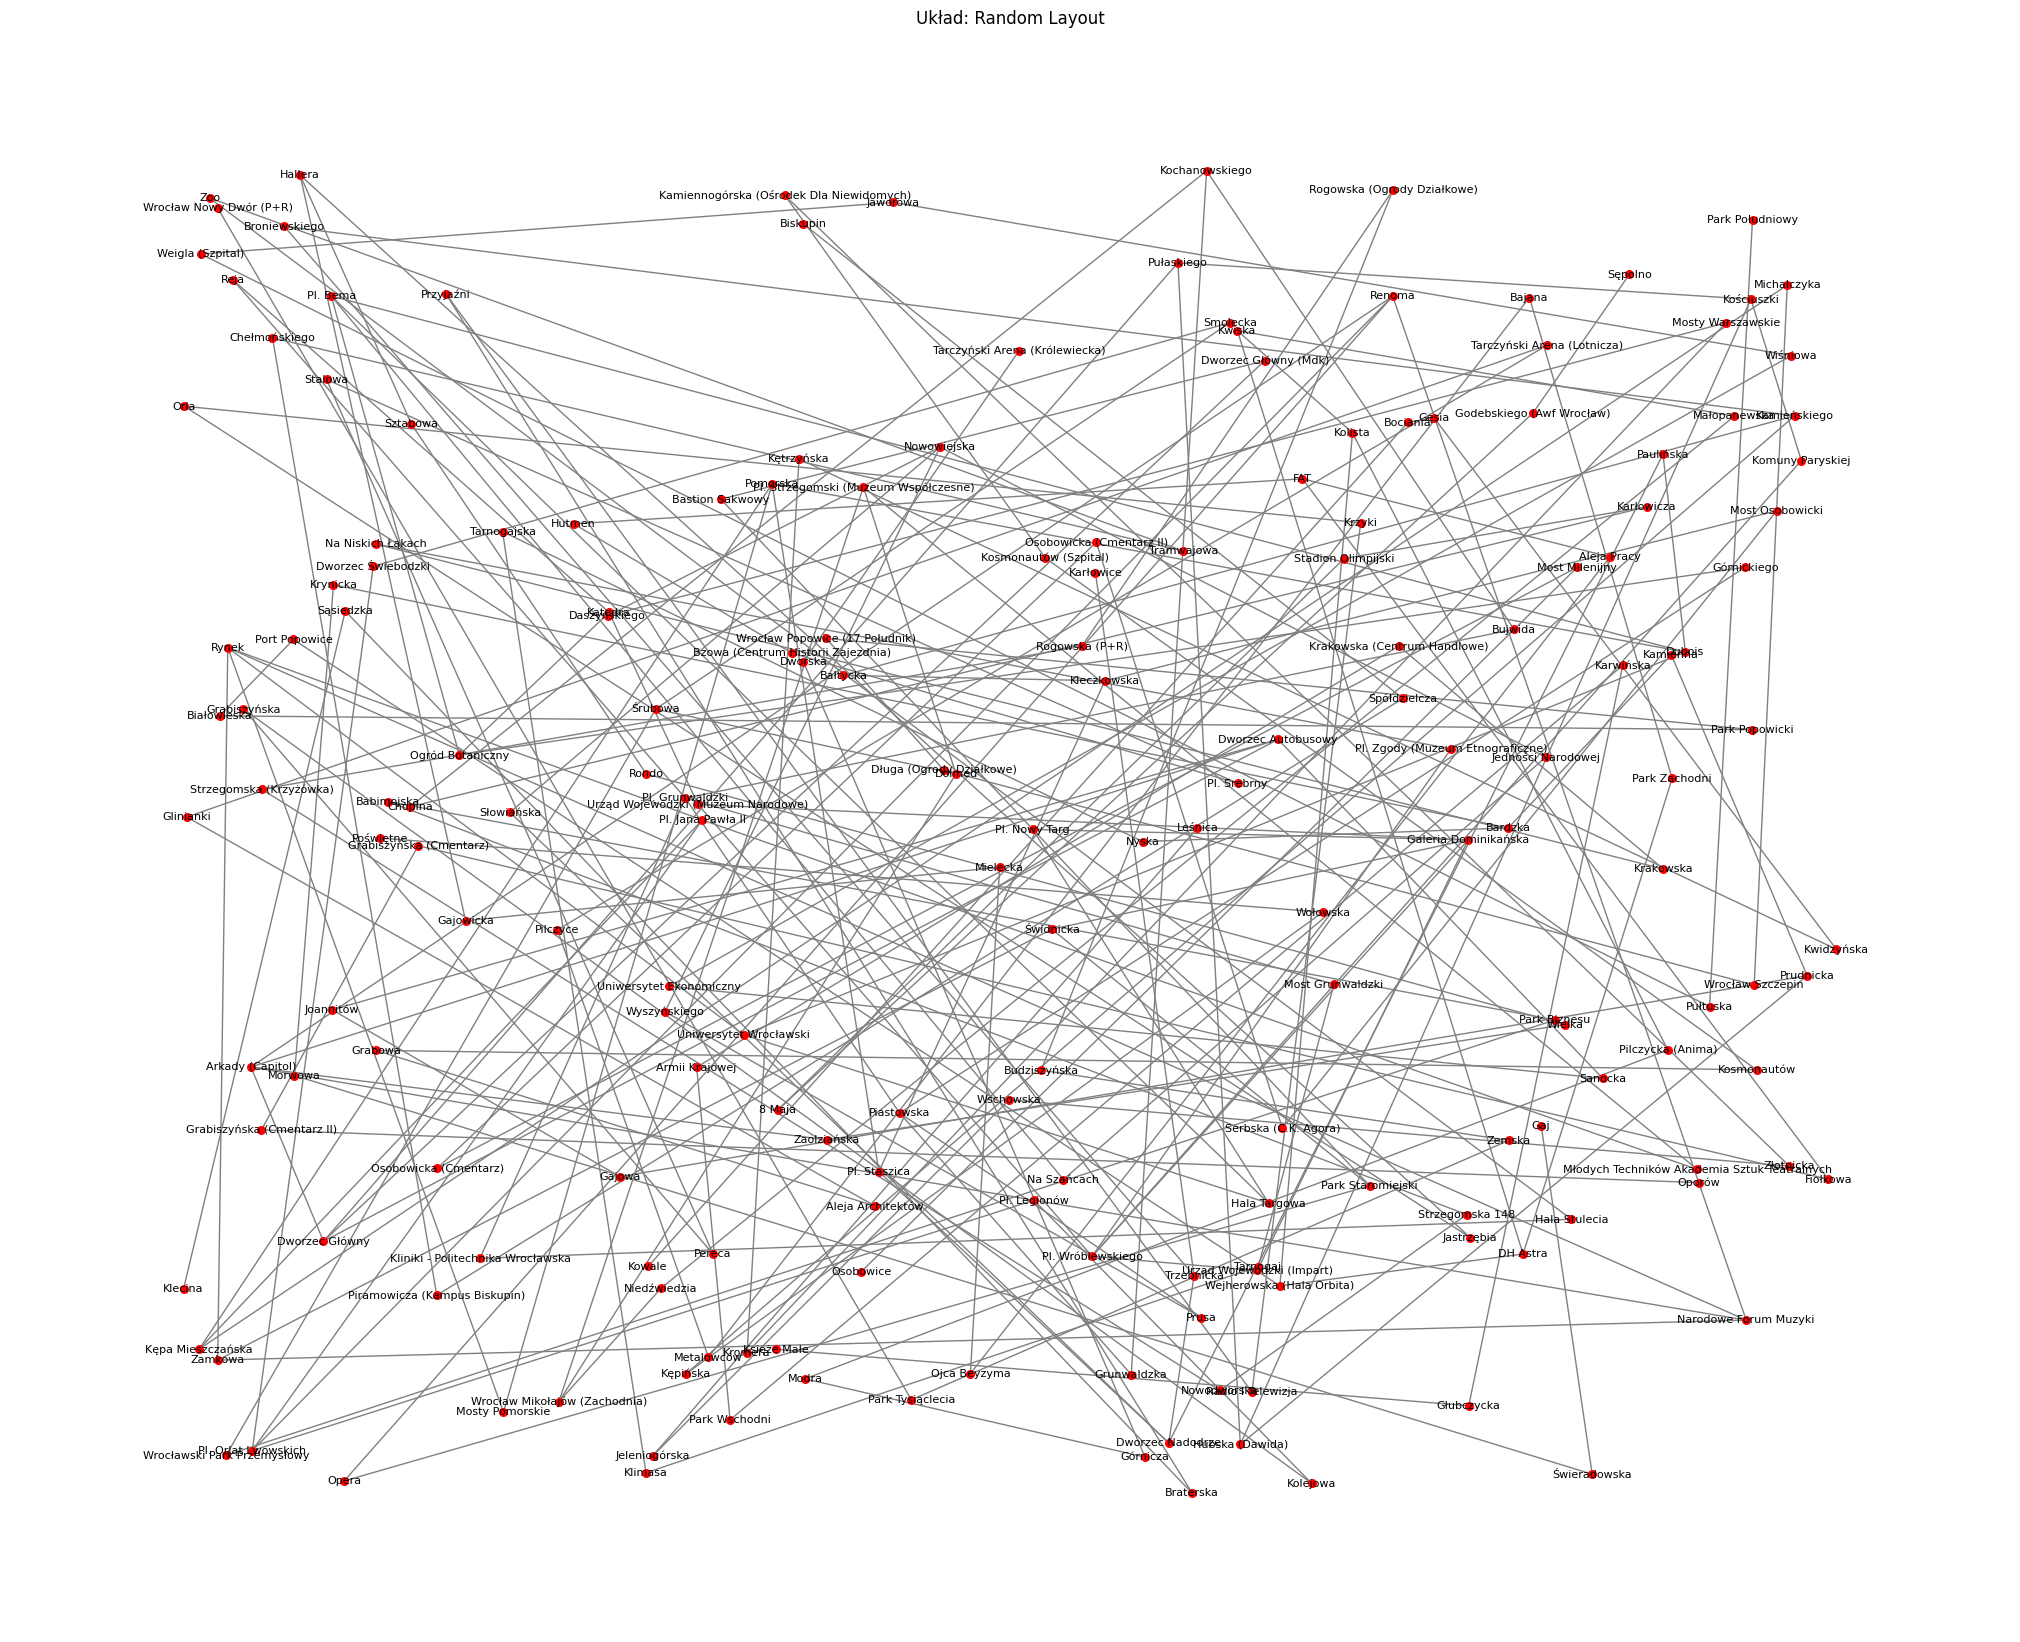

In [47]:
layouts = {
    "Spring Layout": nx.spring_layout(G, seed=42),
    "Kamada-Kawai Layout": nx.kamada_kawai_layout(G),
    "Circular Layout": nx.circular_layout(G),
    "Random Layout": nx.random_layout(G, seed=42),  
}

for layout_name, pos in layouts.items():
    plt.figure(figsize=(20, 16))
    nx.draw(
        G, 
        pos, 
        with_labels=True,
        labels={node: node for node in G.nodes()},  
        node_size=30, 
        font_size=8, 
        node_color="red", 
        edge_color="gray"
    )
    plt.title(f"Układ: {layout_name}")
    plt.show()

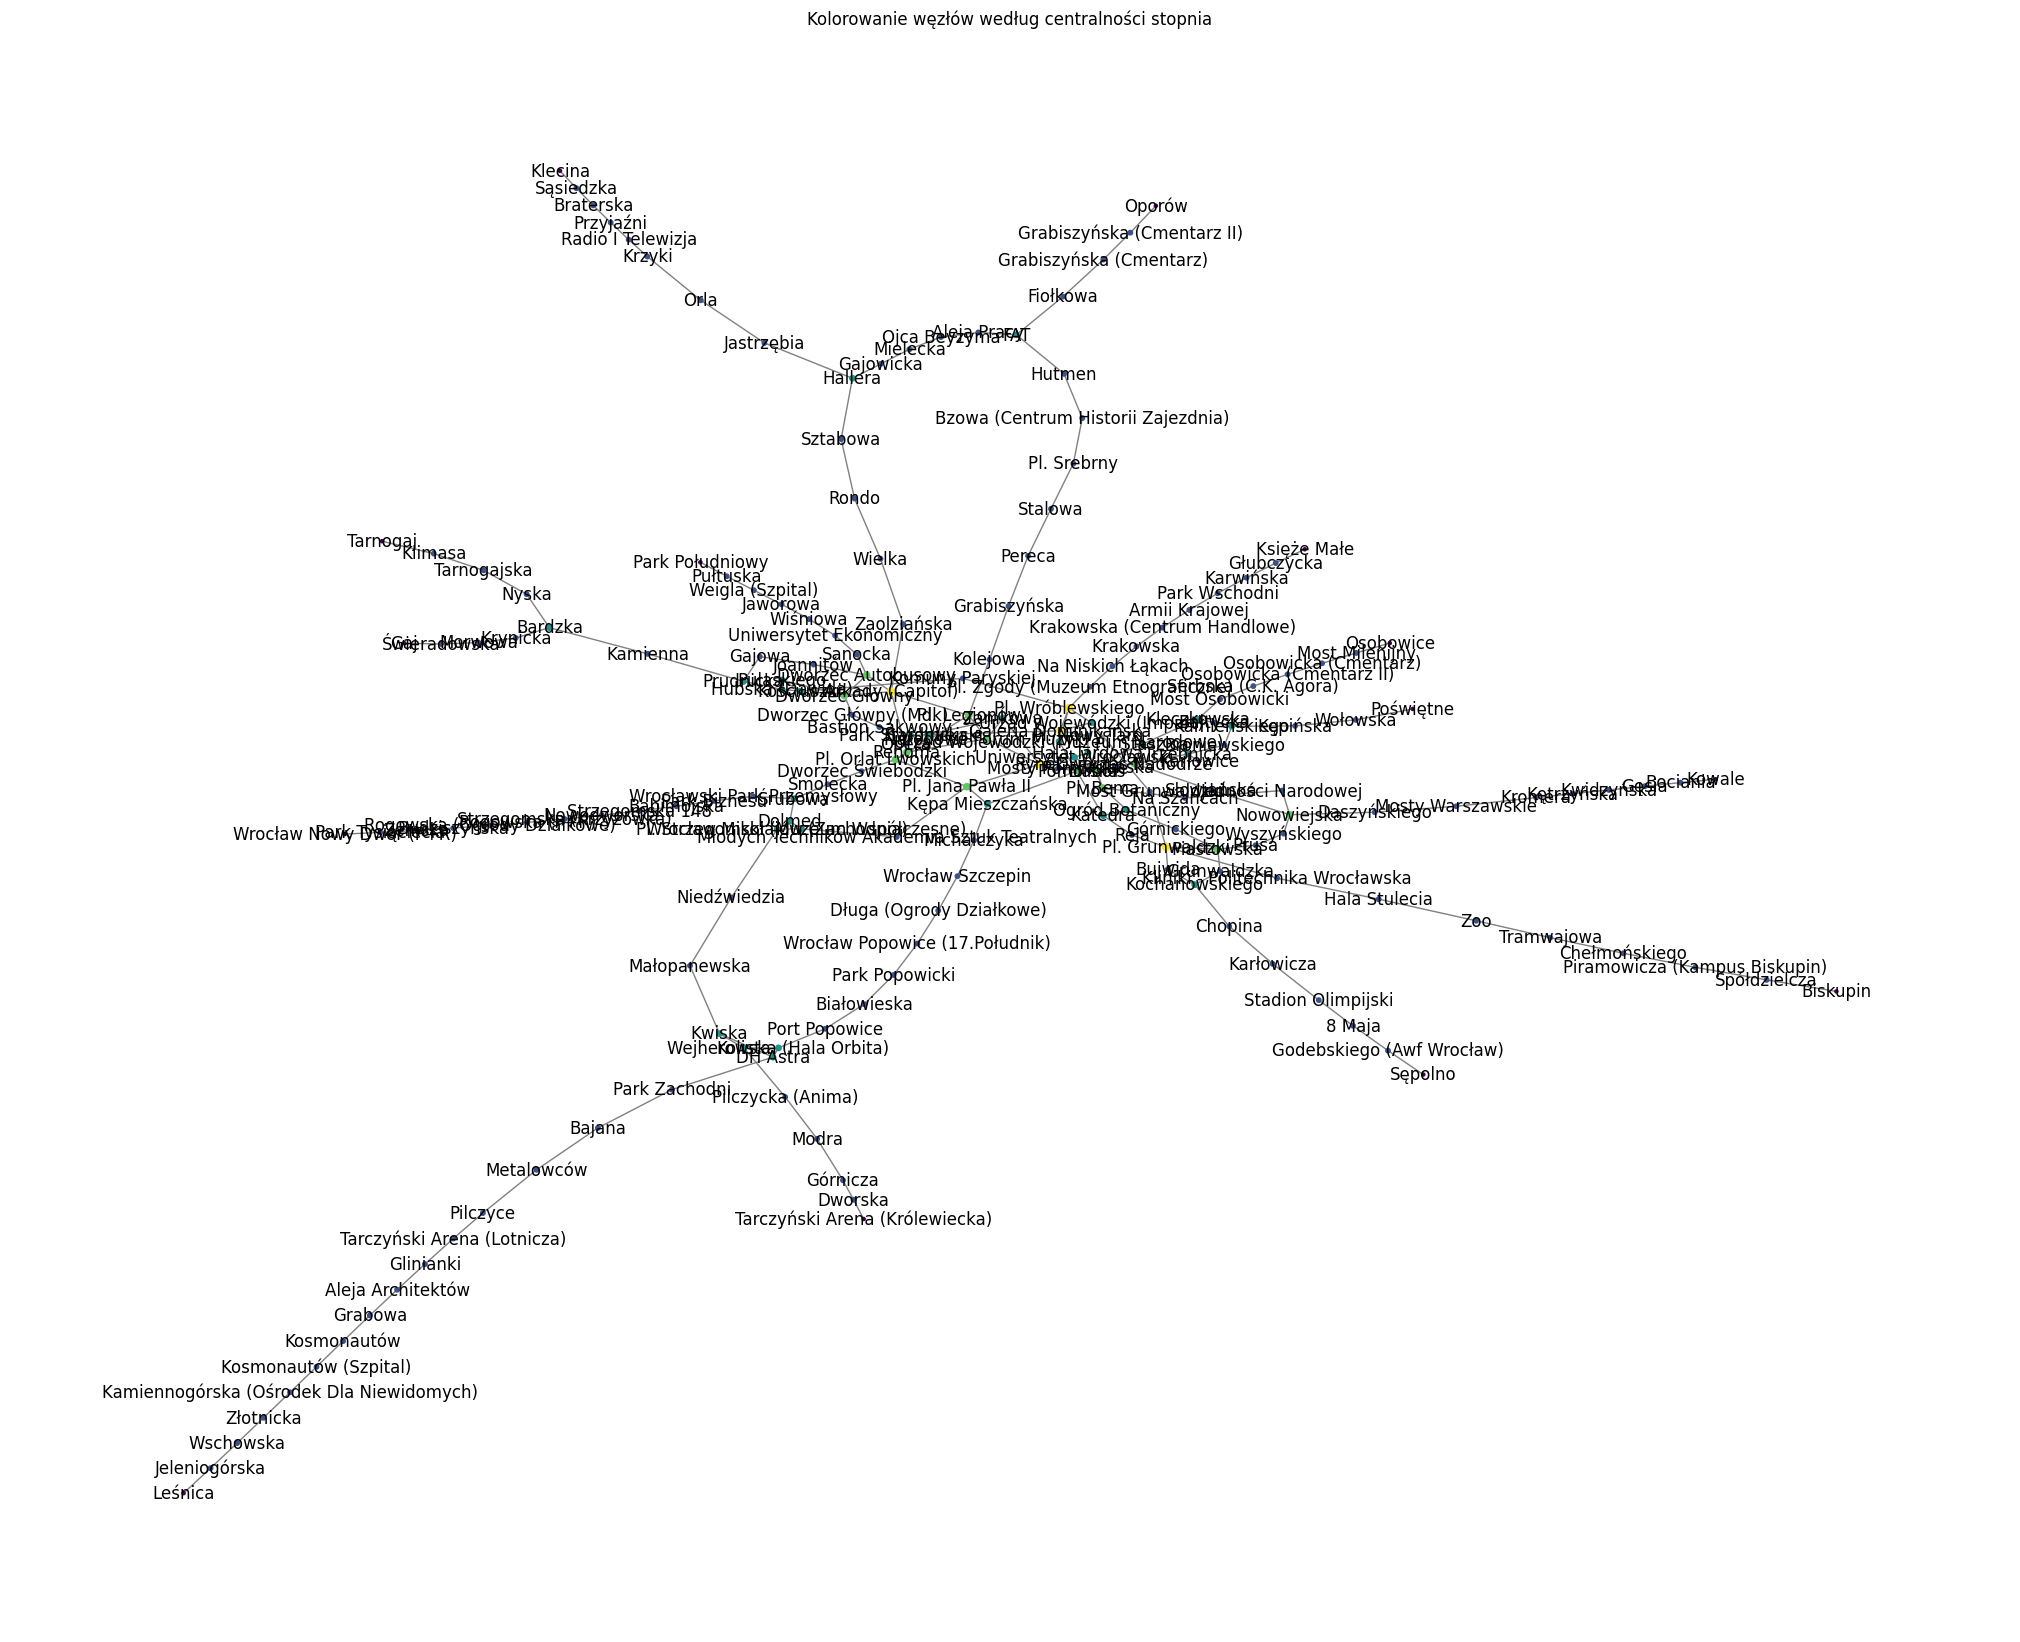

In [61]:
import matplotlib.cm as cm
import matplotlib.colors as colors

degree_centrality = nx.degree_centrality(G)
node_sizes = [v * 1000 for v in degree_centrality.values()]  
node_colors = list(degree_centrality.values()) 

plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(G, scale=4)  
nx.draw(
    G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis, with_labels=True, edge_color="gray"
)
plt.title("Kolorowanie węzłów według centralności stopnia")
plt.show()

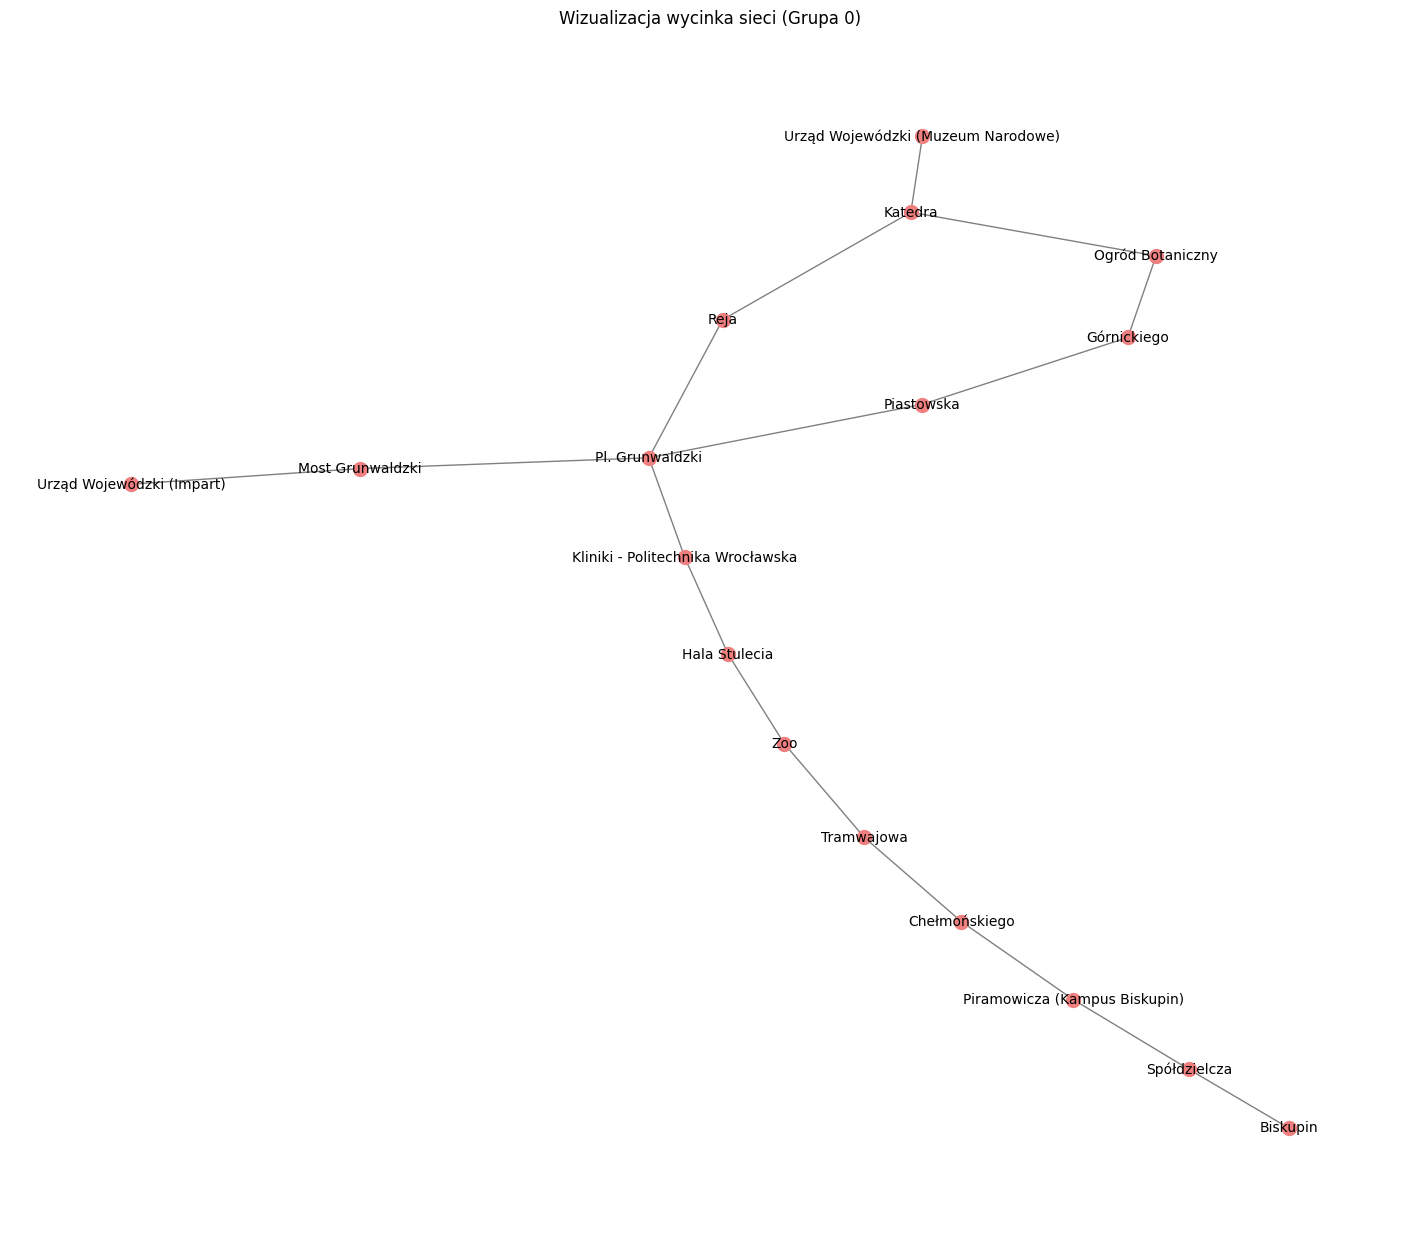

In [54]:
selected_group = 0 
subgraph_nodes = [node for node, group in group_map.items() if group == selected_group]
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(14, 12))
subgraph_pos = nx.spring_layout(subgraph, seed=42)
nx.draw(
    subgraph, subgraph_pos, with_labels=True, node_size=100, font_size=10, node_color="lightcoral", edge_color="gray"
)
plt.title(f"Wizualizacja wycinka sieci (Grupa {selected_group})")
plt.show()

# Analiza rozprzestrzeniania w sieci

Aby przeprowadzić analizę rozprzestrzeniania w sieci tramwajowej, zakładając, że każdy tramwaj kursuje co 15 minut, możemy symulować przepływ informacji (lub pasażerów) w sieci. W tym celu można wykorzystać podejście oparte na modelu dyfuzji w grafie.

## Plan:

### Założenia:
1. Każdy tramwaj kursuje co 15 minut.
2. Informacja (lub pasażer) przemieszcza się między przystankami zgodnie z grafem.
3. Rozprzestrzenianie zaczyna się od jednego lub kilku węzłów (przystanków).
4. Średni czas przejazdu między przystankami wynosi **2 minuty**.

### Symulacja:
1. W każdej iteracji symulacji informacja przemieszcza się do sąsiednich węzłów.
2. Czas przejścia między węzłami zależy od wagi krawędzi (np. liczby linii tramwajowych łączących przystanki) lub jest stały (2 minuty w tym przypadku).

### Wynik:
1. Zbadamy, jak szybko informacja rozprzestrzenia się w sieci.
2. Zwizualizujemy liczbę przystanków, które zostały "zainfekowane" (osiągnięte) w czasie.
3. Wyświetlimy czas dotarcia do każdego przystanku w sieci.


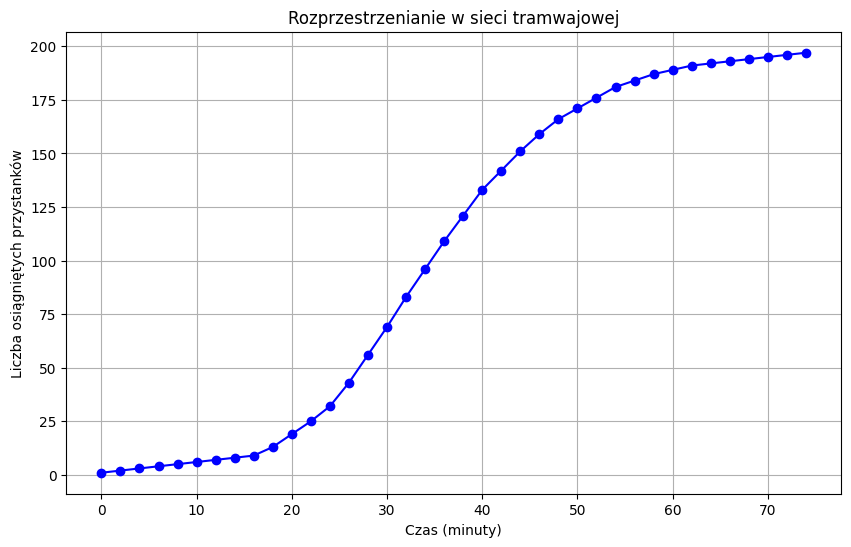

Liczba osiągniętych przystanków: 197
Czas dotarcia do przystanków:
Biskupin: 0.00 min
Spółdzielcza: 2.00 min
Piramowicza (Kampus Biskupin): 4.00 min
Chełmońskiego: 6.00 min
Tramwajowa: 8.00 min
Zoo: 10.00 min
Hala Stulecia: 12.00 min
Kliniki - Politechnika Wrocławska: 14.00 min
Pl. Grunwaldzki: 16.00 min
Piastowska: 18.00 min
Reja: 18.00 min
Most Grunwaldzki: 18.00 min
Bujwida: 18.00 min
Prusa: 20.00 min
Katedra: 20.00 min
Urząd Wojewódzki (Impart): 20.00 min
Górnickiego: 20.00 min
Grunwaldzka: 20.00 min
Kochanowskiego: 20.00 min
Wyszyńskiego: 22.00 min
Urząd Wojewódzki (Muzeum Narodowe): 22.00 min
Pl. Wróblewskiego: 22.00 min
Galeria Dominikańska: 22.00 min
Ogród Botaniczny: 22.00 min
Chopina: 22.00 min
Nowowiejska: 24.00 min
Komuny Paryskiej: 24.00 min
Pl. Zgody (Muzeum Etnograficzne): 24.00 min
Świdnicka: 24.00 min
Pl. Bema: 24.00 min
Karłowicza: 24.00 min
Pl. Nowy Targ: 24.00 min
Słowiańska: 26.00 min
Kościuszki: 26.00 min
Na Niskich Łąkach: 26.00 min
Zamkowa: 26.00 min
Daszyńskieg

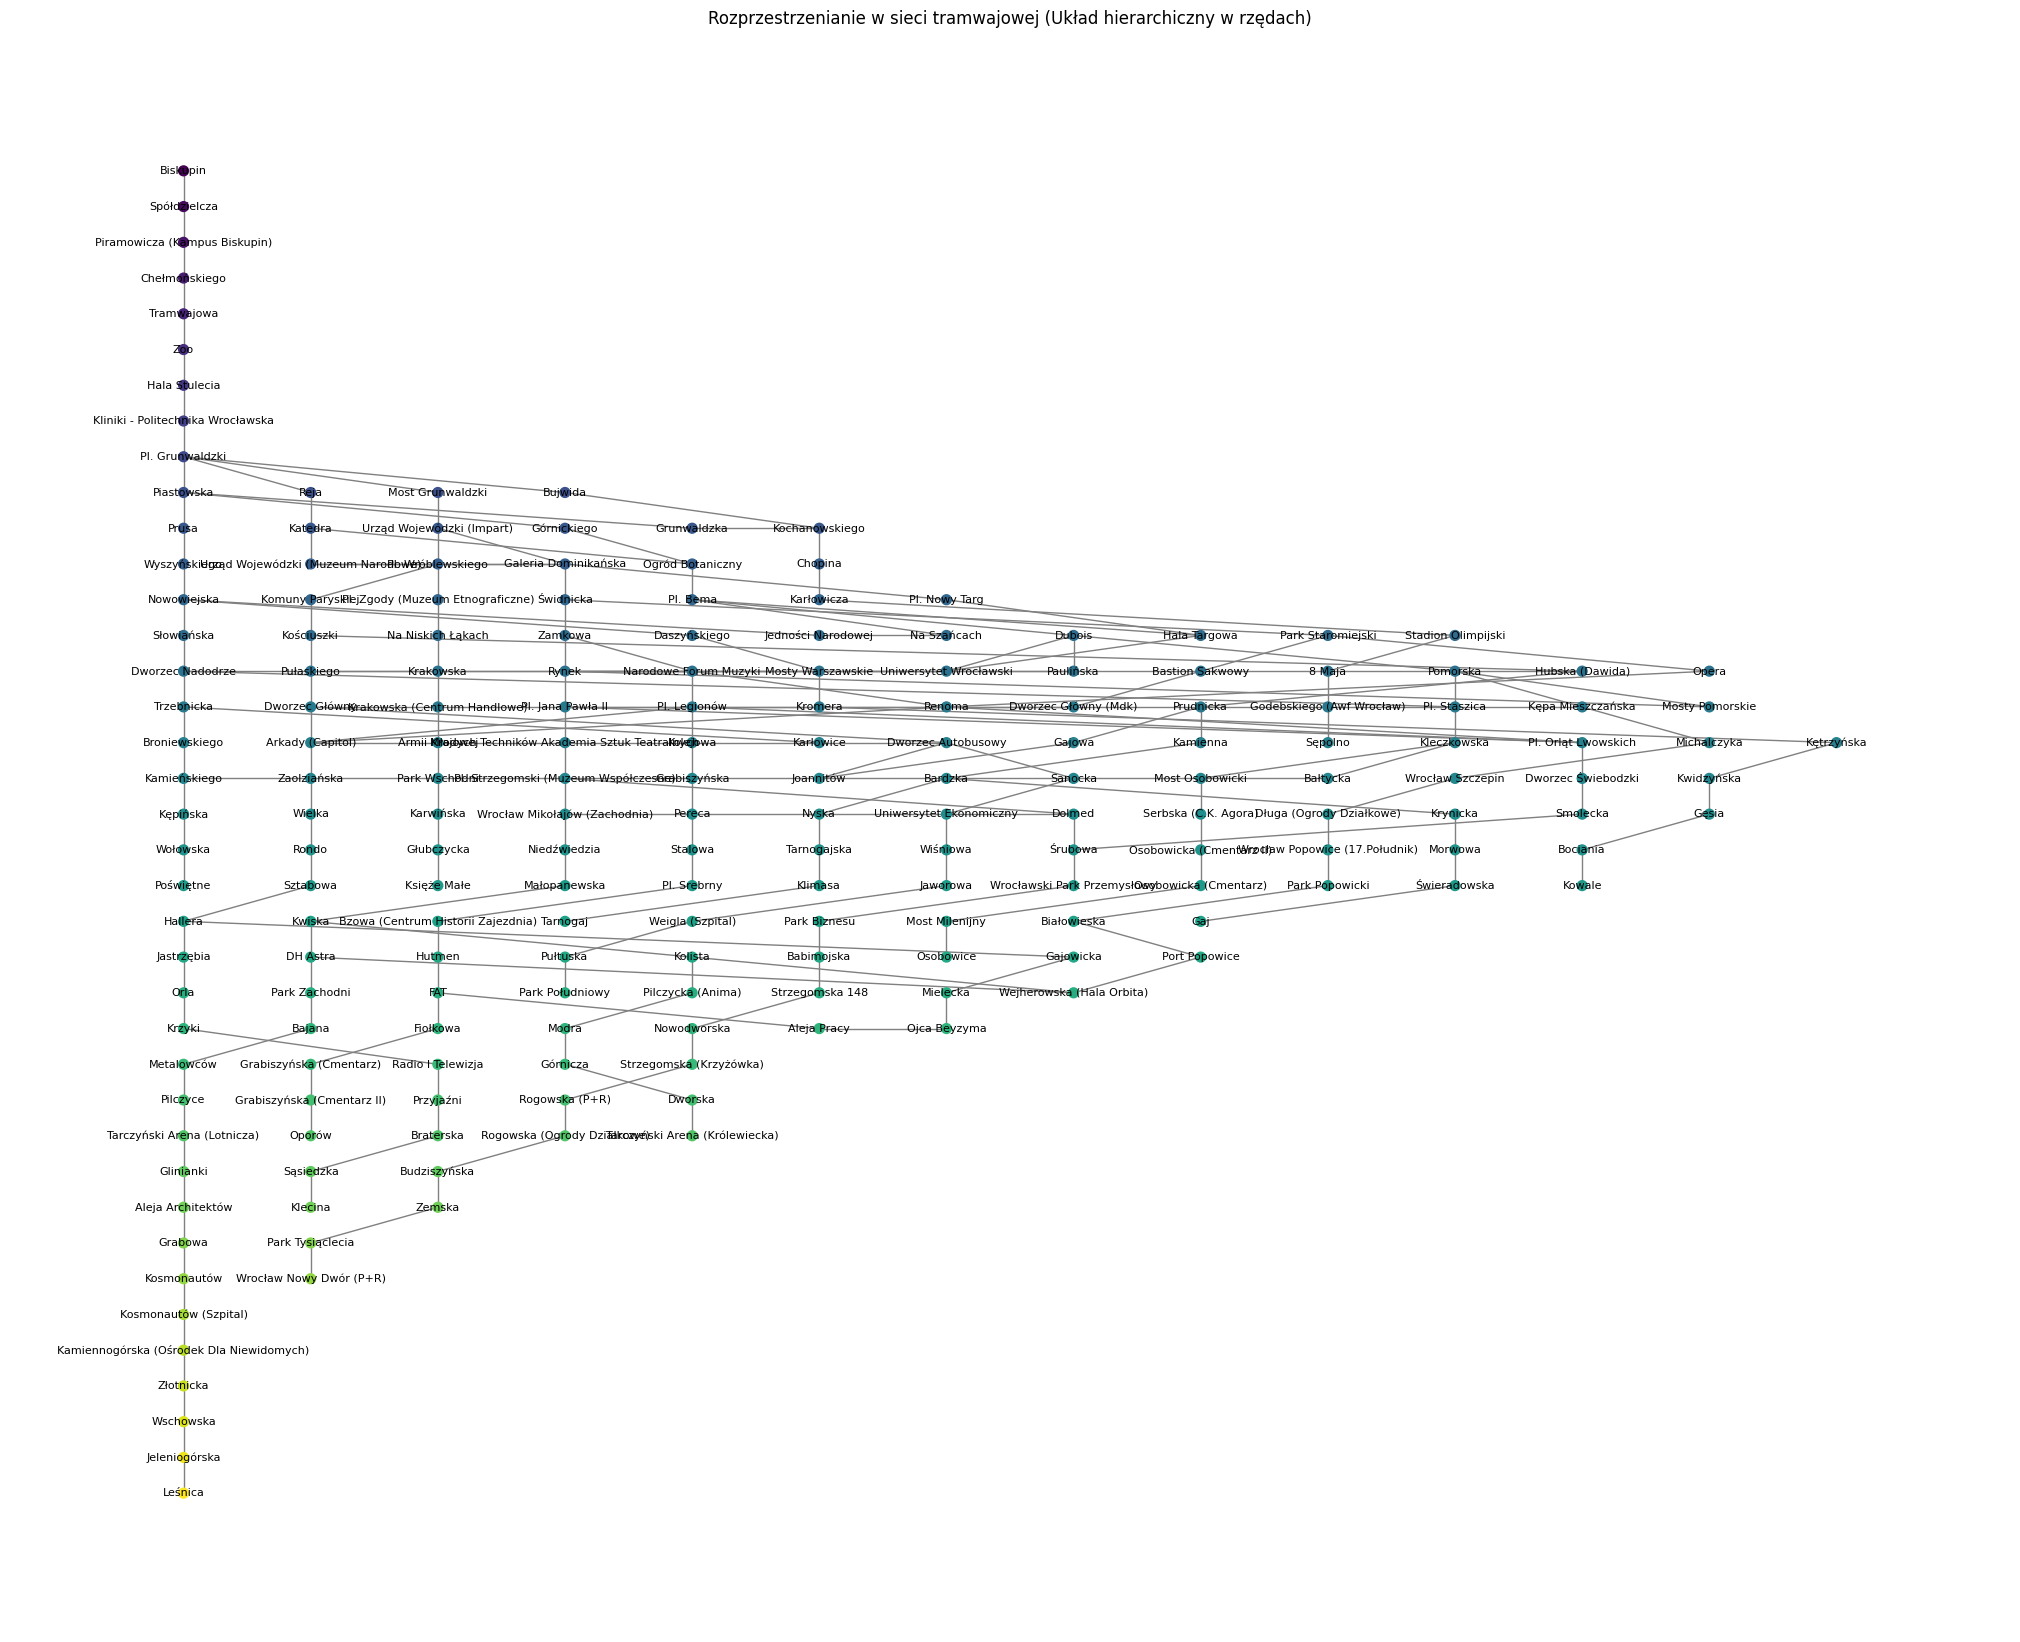

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

start_nodes = ["Biskupin"]  
time_per_stop = 2 
max_time = 120  

travel_time = {edge: time_per_stop for edge in G.edges()} 

def simulate_spread(G, start_nodes, travel_time, max_time):
    reached = set(start_nodes)  
    time_to_reach = {node: float('inf') for node in G.nodes()}  
    for node in start_nodes:
        time_to_reach[node] = 0

    queue = [(0, node) for node in start_nodes]

    while queue:
        queue.sort() 
        current_time, current_node = queue.pop(0)

        for neighbor in G.neighbors(current_node):
            edge = tuple(sorted((current_node, neighbor)))
            travel = travel_time.get(edge, time_per_stop) 
            new_time = current_time + travel

            if new_time < time_to_reach[neighbor] and new_time <= max_time:
                time_to_reach[neighbor] = new_time
                reached.add(neighbor)
                queue.append((new_time, neighbor))

    return time_to_reach, reached

time_to_reach, reached_nodes = simulate_spread(G, start_nodes, travel_time, max_time)

plt.figure(figsize=(10, 6))
times = sorted(set(time_to_reach.values()))
infected_counts = [sum(1 for t in time_to_reach.values() if t <= time) for time in times]

plt.plot(times, infected_counts, marker="o", color="blue")
plt.title("Rozprzestrzenianie w sieci tramwajowej")
plt.xlabel("Czas (minuty)")
plt.ylabel("Liczba osiągniętych przystanków")
plt.grid()
plt.show()

print(f"Liczba osiągniętych przystanków: {len(reached_nodes)}")
print("Czas dotarcia do przystanków:")
for node, time in sorted(time_to_reach.items(), key=lambda x: x[1]):
    print(f"{node}: {time:.2f} min")

plt.figure(figsize=(20, 16))

layers = defaultdict(list)
for node, time in time_to_reach.items():
    layers[time].append(node)

pos_hierarchic = {}
y_offset = 0  
for time, nodes in sorted(layers.items()):
    x_offset = 0 
    for node in nodes:
        pos_hierarchic[node] = (x_offset, -y_offset)  
        x_offset += 1  
    y_offset += 1  

nx.draw(
    G, pos=pos_hierarchic, with_labels=True, node_size=50, font_size=8,
    node_color=[time_to_reach[node] for node in G.nodes()],
    cmap=plt.cm.viridis, edge_color="gray"
)

plt.title("Rozprzestrzenianie w sieci tramwajowej (Układ hierarchiczny w rzędach)")
plt.show()